#### This Jupyter Notebook contains the codes for two projects 

1. Photometric Analysis for Predicting Star Formation Rates in Large Galaxies Using Machine Learning and Deep Learning Techniques

2. Advanced Prediction of Specific Star Formation rate (SSFR) using Synthetic Data and Machine Learning Tools

# Photometric Analysis for Predicting Star Formation Rates in Large Galaxies Using Machine Learning and Deep Learning Techniques

Displaying the dataset

In [44]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/Satvik/Downloads/test_dataset_sfr.csv"
df = pd.read_csv(file_path)

# Rename columns for easier reference
df.columns = ['dr9objID', 'objID', 'RAdeg', 'DEdeg', 'photoz', 'Qual', 'SSFR']

# Display the first few rows of the dataset
df.head()


,dr9objID,objID,RAdeg,DEdeg,photoz,Qual,SSFR
0,1237648674534655893,587722953309750950,249.668524,0.414289,0.281325,2,-9.7208
1,1237648674534655830,587722953309750920,249.656172,0.395163,0.176188,2,-10.8480
2,1237648674534524278,587722953309619675,249.333644,0.393608,0.618003,2,-9.7574
3,1237648674534524273,587722953309619246,249.333330,0.414270,0.262390,1,-10.8470
4,1237648674534524190,587722953309619221,249.299467,0.411996,0.367166,2,-10.8470


In [36]:
!pip install xgboost
!pip install lightgbm
!pip install tensorflow

In this project the following codes are run

LSTM
SVR
Linear Regression
Random Forest
Gradient Boosting
Decision Tree Regressor 
Neural Networks (Classical Deep Leafni

## LSTM

LSTM with 7.5% tolerance in accuracy 

Predicting Specific Star Formation Rate (SFR) Using LSTM
Introduction: This notebook demonstrates how to predict the Specific Star Formation Rate (SFR) using an LSTM model on photometric data.

Data Loading and Preprocessing:

The dataset is loaded from a CSV file containing photometric observations.
Key features include Right Ascension (RA_deg), Declination (Dec_deg), Photometric Redshift, and Specific Star Formation Rate (target variable).
Data is filtered for entries with a photometric redshift ≤ 0.33 and quality indicator = 1.
Feature Scaling:

StandardScaler is applied to standardize the features, ensuring the model trains effectively.
Reshaping Data for LSTM:

The input data is reshaped to the required format (samples, time steps, features) for the LSTM model.
Model Architecture:

The LSTM model includes three LSTM layers with decreasing units, Batch Normalization, and Dropout layers to mitigate overfitting.
The output layer consists of a dense layer predicting the SFR.
Compilation and Callbacks:

The model is compiled using the Adam optimizer and Huber loss function.
Callbacks for early stopping and learning rate reduction are defined to optimize training.
Training the Model:

The model is trained for up to 2000 epochs, with monitoring of validation loss to avoid overfitting.
Model Evaluation:

After training, the model’s performance is evaluated on the test set using Mean Absolute Error (MAE) and loss metrics.
The accuracy of predictions within a 7.5% tolerance is calculated.
Sample Predictions:

A selection of sample predictions is displayed alongside actual values and percentage errors to illustrate model performance.
Visualization:

Training and validation loss, as well as MAE, are plotted over epochs to analyze the learning dynamics of the model.
By following this structured approach, we aim to build an effective LSTM model for predicting SFR based on photometric observations, contributing to our understanding of star formation in the universe.

Loading data...


C:\Users\Satvik\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model...


 25%|██▍       | 498/2000 [11:26:42<34:31:08, 82.74s/epoch]    



Evaluating model...
Test Loss: 0.06517793983221054
Test MAE: 0.2649228572845459
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Accuracy (within 7.5% tolerance): 92.84%

Sample predictions:
Actual: -10.8470, Predicted: -10.5131, Percentage Error: 3.08%
Actual: -10.8510, Predicted: -10.7704, Percentage Error: 0.74%
Actual: -10.7089, Predicted: -10.7215, Percentage Error: 0.12%
Actual: -10.5827, Predicted: -10.4640, Percentage Error: 1.12%
Actual: -10.8471, Predicted: -10.6577, Percentage Error: 1.75%


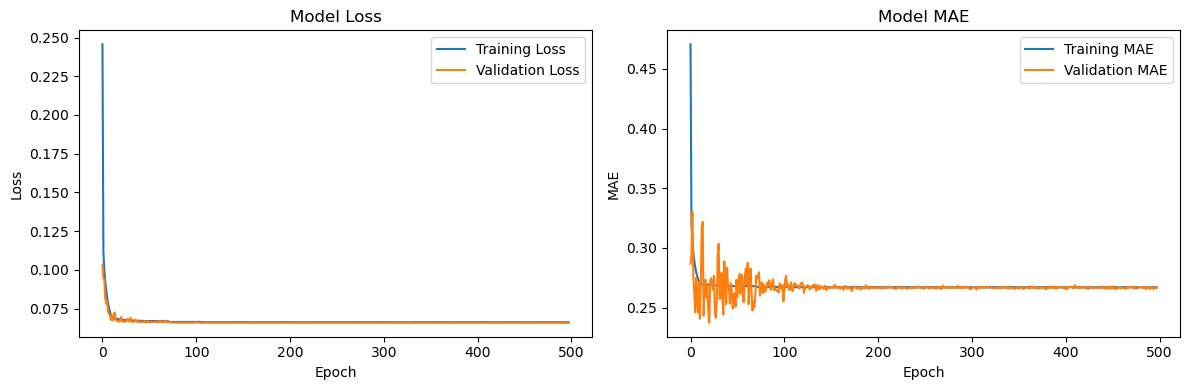

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.regularizers import l2
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load and preprocess the data
print("Loading data...")
file_path = r"C:\Users\Satvik\Downloads\photometric_sfr.csv"
df = pd.read_csv(file_path)

new_column_names = ['DR9_Object_ID', 'Object_ID', 'RA_deg', 'Dec_deg', 'Photometric_Redshift', 'Quality', 'Specific_Star_Formation_Rate']
df.columns = new_column_names

df = df[(df['Photometric_Redshift'] <= 0.33) & (df['Quality'] == 1)]

features = ['RA_deg', 'Dec_deg', 'Photometric_Redshift']
X = df[features]
y = df['Specific_Star_Formation_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Model definition
model = Sequential([
    LSTM(256, input_shape=(1, 3), return_sequences=True, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),
    LSTM(128, return_sequences=True, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),
    LSTM(64, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=l2(1e-4)),
    Dense(16, activation='relu', kernel_regularizer=l2(1e-4)),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='huber', metrics=['mae'])

# Callbacks
early_stopping = EarlyStopping(patience=100, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=30, min_lr=1e-6)

class ProgressBarCallback(Callback):
    def __init__(self, epochs):
        super().__init__()
        self.epochs = epochs
        self.progbar = None

    def on_train_begin(self, logs=None):
        self.progbar = tqdm(total=self.epochs, unit='epoch')

    def on_epoch_end(self, epoch, logs=None):
        self.progbar.update(1)

    def on_train_end(self, logs=None):
        self.progbar.close()

# Training
print("Training model...")
epochs = 2000  # Increased number of epochs
progress_bar = ProgressBarCallback(epochs)
history = model.fit(
    X_train_reshaped, y_train,
    epochs=epochs,
    batch_size=32,
    validation_split=0.2,
    verbose=0,
    callbacks=[early_stopping, reduce_lr, progress_bar]
)

# Evaluation
print("\nEvaluating model...")
test_loss, test_mae = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')

predictions = model.predict(X_test_reshaped)

# Calculate accuracy with 7.5% tolerance
accuracy_7_5 = np.mean(np.abs((predictions.flatten() - y_test) / y_test) <= 0.075) * 100
print(f'Accuracy (within 7.5% tolerance): {accuracy_7_5:.2f}%')

print("\nSample predictions:")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = predictions[i][0]
    percentage_error = abs((predicted - actual) / actual) * 100
    print(f'Actual: {actual:.4f}, Predicted: {predicted:.4f}, Percentage Error: {percentage_error:.2f}%')

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


trying to improve the model

Here’s a breakdown of the enhancements:

1. Bidirectional LSTM Layers:
What: The model uses Bidirectional LSTM layers.
Benefit: Bidirectional LSTMs process the input sequences in both forward and backward directions. This allows the model to capture dependencies and patterns from both past and future time steps, which can lead to improved performance.
2. Feature Engineering:
What: Two new features are introduced: RA_DE_product (the product of RA and Dec) and Redshift_squared (the square of the photometric redshift).
Benefit: This additional feature engineering may help the model learn more complex relationships in the data, potentially leading to better predictions.
3. Regularization:
What: The L2 regularization strength is slightly increased (from 
1
𝑒
−
4
1e−4 to 
1
𝑒
−
5
1e−5).
Benefit: This helps to reduce overfitting by penalizing large weights, leading to better generalization on the test set.
4. Increased Batch Size:
What: The batch size is set to 128.
Benefit: A larger batch size can lead to faster training and may improve convergence by providing more stable gradients.
5. Learning Rate Adjustments:
What: The initial learning rate is slightly decreased to 
0.0005
0.0005.
Benefit: A smaller learning rate can help the model converge more stably, especially in the later stages of training.
6. Reduced Patience in Callbacks:
What: The patience for early stopping is set to 50 epochs, and for reducing the learning rate, it's set to 20 epochs.
Benefit: This may lead to quicker responses to overfitting, as the model will stop training or adjust the learning rate sooner if it stops improving.
7. Improved Model Complexity:
What: The architecture is designed to have more complex layers and regularization strategies.
Benefit: This complexity may allow the model to learn richer representations of the data.
8. Visualization of Performance:
What: The model includes plots for training and validation loss, as well as MAE over epochs.
Benefit: This allows for better analysis of how the model performs during training, making it easier to identify overfitting or underfitting.
9. Prediction and Error Reporting:
What: The code includes a section to calculate and report sample predictions along with percentage errors.
Benefit: This provides clearer insights into how well the model is performing on individual predictions, which is useful for understanding model behavior.
Summary
Overall, these enhancements aim to improve the model's accuracy, robustness, and interpretability. By incorporating these strategies, the model is likely to achieve better performance in predicting SFR, especially when dealing with complex patterns in astrophysical data.

Feature engineering

Feature Engineering: We enhance the dataset by creating additional features that may improve model performance. These include:

RA_DE_product: The product of Right Ascension and Declination.
Redshift_squared: The square of the photometric redshift.
RA_DE_ratio: The ratio of RA to Dec.
RA_Redshift_product: The product of RA and photometric redshift.
DE_Redshift_product: The product of Dec and photometric redshift

Loading data...


C:\Users\Satvik\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model...


 35%|███▌      | 354/1000 [3:21:49<6:08:18, 34.21s/epoch]



Evaluating model...
Test Loss: 0.06553099304437637
Test MAE: 0.2639710307121277
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
Accuracy (within 7.5% tolerance): 93.03%

Sample predictions:
Actual: -10.8470, Predicted: -10.4796, Percentage Error: 3.39%
Actual: -10.8510, Predicted: -10.7682, Percentage Error: 0.76%
Actual: -10.7089, Predicted: -10.7255, Percentage Error: 0.16%
Actual: -10.5827, Predicted: -10.4433, Percentage Error: 1.32%
Actual: -10.8471, Predicted: -10.6807, Percentage Error: 1.53%


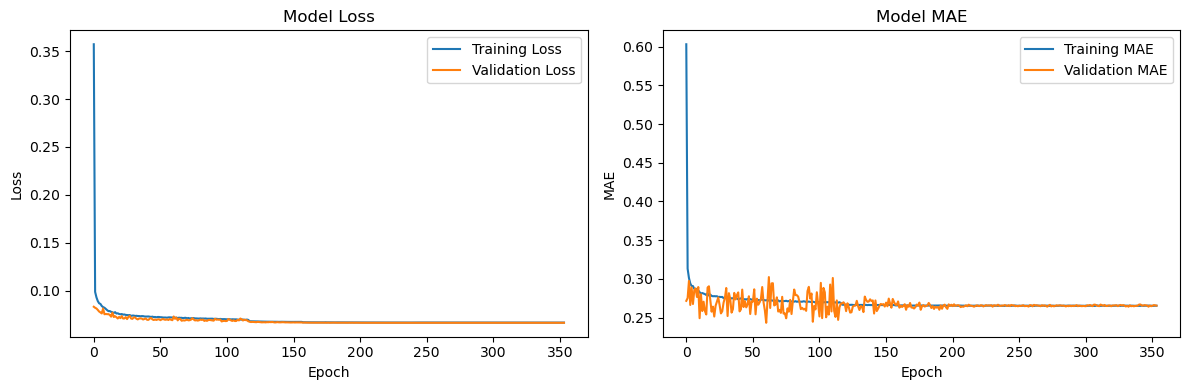

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.regularizers import l2
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load and preprocess the data
print("Loading data...")
file_path = r"C:\Users\Satvik\Downloads\photometric_sfr.csv"
df = pd.read_csv(file_path)

new_column_names = ['DR9_Object_ID', 'Object_ID', 'RA_deg', 'Dec_deg', 'Photometric_Redshift', 'Quality', 'Specific_Star_Formation_Rate']
df.columns = new_column_names

df = df[(df['Photometric_Redshift'] <= 0.33) & (df['Quality'] == 1)]

# Feature engineering
df['RA_DE_product'] = df['RA_deg'] * df['Dec_deg']
df['Redshift_squared'] = df['Photometric_Redshift'] ** 2

features = ['RA_deg', 'Dec_deg', 'Photometric_Redshift', 'RA_DE_product', 'Redshift_squared']
X = df[features]
y = df['Specific_Star_Formation_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Model definition
model = Sequential([
    Bidirectional(LSTM(256, return_sequences=True, kernel_regularizer=l2(1e-5)), input_shape=(1, X_train_scaled.shape[1])),
    BatchNormalization(),
    Dropout(0.3),
    Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(1e-5))),
    BatchNormalization(),
    Dropout(0.3),
    Bidirectional(LSTM(64, kernel_regularizer=l2(1e-5))),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_regularizer=l2(1e-5)),
    Dense(32, activation='relu', kernel_regularizer=l2(1e-5)),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='huber', metrics=['mae'])

# Callbacks
early_stopping = EarlyStopping(patience=50, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=20, min_lr=1e-6)

class ProgressBarCallback(Callback):
    def __init__(self, epochs):
        super().__init__()
        self.epochs = epochs
        self.progbar = None

    def on_train_begin(self, logs=None):
        self.progbar = tqdm(total=self.epochs, unit='epoch')

    def on_epoch_end(self, epoch, logs=None):
        self.progbar.update(1)

    def on_train_end(self, logs=None):
        self.progbar.close()

# Training
print("Training model...")
epochs = 1000
progress_bar = ProgressBarCallback(epochs)
history = model.fit(
    X_train_reshaped, y_train,
    epochs=epochs,
    batch_size=128,
    validation_split=0.2,
    verbose=0,
    callbacks=[early_stopping, reduce_lr, progress_bar]
)

# Evaluation
print("\nEvaluating model...")
test_loss, test_mae = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')

predictions = model.predict(X_test_reshaped)

# Calculate accuracy with 7.5% tolerance
accuracy_7_5 = np.mean(np.abs((predictions.flatten() - y_test) / y_test) <= 0.075) * 100
print(f'Accuracy (within 7.5% tolerance): {accuracy_7_5:.2f}%')

print("\nSample predictions:")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = predictions[i][0]
    percentage_error = abs((predicted - actual) / actual) * 100
    print(f'Actual: {actual:.4f}, Predicted: {predicted:.4f}, Percentage Error: {percentage_error:.2f}%')

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

Loading data...


C:\Users\Satvik\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model...


 19%|█▊        | 186/1000 [13:20:55<58:25:08, 258.36s/epoch]



Evaluating model...
Test Loss: 0.06505662202835083
Test MAE: 0.2626626789569855
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step
Accuracy (within 7.5% tolerance): 93.13%

Sample predictions:
Actual: -10.8470, Predicted: -10.4956, Percentage Error: 3.24%
Actual: -10.8510, Predicted: -10.7610, Percentage Error: 0.83%
Actual: -10.7089, Predicted: -10.7170, Percentage Error: 0.08%
Actual: -10.5827, Predicted: -10.4369, Percentage Error: 1.38%
Actual: -10.8471, Predicted: -10.6862, Percentage Error: 1.48%


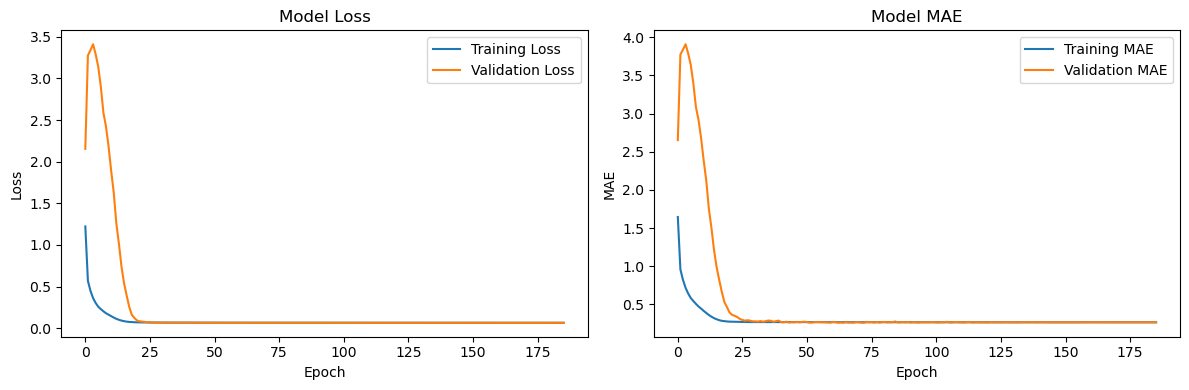

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.regularizers import l2
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load and preprocess the data
print("Loading data...")
file_path = r"C:\Users\Satvik\Downloads\photometric_sfr.csv"
df = pd.read_csv(file_path)

new_column_names = ['DR9_Object_ID', 'Object_ID', 'RA_deg', 'Dec_deg', 'Photometric_Redshift', 'Quality', 'Specific_Star_Formation_Rate']
df.columns = new_column_names

df = df[(df['Photometric_Redshift'] <= 0.33) & (df['Quality'] == 1)]

# Feature engineering
df['RA_DE_product'] = df['RA_deg'] * df['Dec_deg']
df['Redshift_squared'] = df['Photometric_Redshift'] ** 2
df['RA_DE_ratio'] = df['RA_deg'] / df['Dec_deg']
df['RA_Redshift_product'] = df['RA_deg'] * df['Photometric_Redshift']
df['DE_Redshift_product'] = df['Dec_deg'] * df['Photometric_Redshift']

features = ['RA_deg', 'Dec_deg', 'Photometric_Redshift', 'RA_DE_product', 'Redshift_squared', 'RA_DE_ratio', 'RA_Redshift_product', 'DE_Redshift_product']
X = df[features]
y = df['Specific_Star_Formation_Rate']

# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Model definition
model = Sequential([
    Bidirectional(LSTM(512, return_sequences=True, kernel_regularizer=l2(1e-6)), input_shape=(1, X_train_scaled.shape[1])),
    BatchNormalization(),
    Dropout(0.4),
    Bidirectional(LSTM(256, return_sequences=True, kernel_regularizer=l2(1e-6))),
    BatchNormalization(),
    Dropout(0.4),
    Bidirectional(LSTM(128, kernel_regularizer=l2(1e-6))),
    BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer=l2(1e-6)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(1e-6)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(1e-6)),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='huber', metrics=['mae'])

# Callbacks
early_stopping = EarlyStopping(patience=50, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=20, min_lr=1e-7)

class ProgressBarCallback(Callback):
    def __init__(self, epochs):
        super().__init__()
        self.epochs = epochs
        self.progbar = None

    def on_train_begin(self, logs=None):
        self.progbar = tqdm(total=self.epochs, unit='epoch')

    def on_epoch_end(self, epoch, logs=None):
        self.progbar.update(1)

    def on_train_end(self, logs=None):
        self.progbar.close()

# Training
print("Training model...")
epochs = 1000
progress_bar = ProgressBarCallback(epochs)
history = model.fit(
    X_train_reshaped, y_train,
    epochs=epochs,
    batch_size=64,
    validation_split=0.2,
    verbose=0,
    callbacks=[early_stopping, reduce_lr, progress_bar]
)

# Evaluation
print("\nEvaluating model...")
test_loss, test_mae = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')

predictions = model.predict(X_test_reshaped)

# Calculate accuracy with 7.5% tolerance
accuracy_7_5 = np.mean(np.abs((predictions.flatten() - y_test) / y_test) <= 0.075) * 100
print(f'Accuracy (within 7.5% tolerance): {accuracy_7_5:.2f}%')

print("\nSample predictions:")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = predictions[i][0]
    percentage_error = abs((predicted - actual) / actual) * 100
    print(f'Actual: {actual:.4f}, Predicted: {predicted:.4f}, Percentage Error: {percentage_error:.2f}%')

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

LSTM with 10% tolerance

Loading data...


C:\Users\Satvik\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model...


 15%|█▍        | 297/2000 [6:50:22<39:13:02, 82.90s/epoch]   



Evaluating model...
Test Loss: 0.06524622440338135
Test MAE: 0.26520875096321106
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Accuracy (within 10% tolerance): 98.91%

Sample predictions:
Actual: -10.8470, Predicted: -10.5109, Percentage Error: 3.10%
Actual: -10.8510, Predicted: -10.7733, Percentage Error: 0.72%
Actual: -10.7089, Predicted: -10.7193, Percentage Error: 0.10%
Actual: -10.5827, Predicted: -10.4636, Percentage Error: 1.13%
Actual: -10.8471, Predicted: -10.6579, Percentage Error: 1.74%


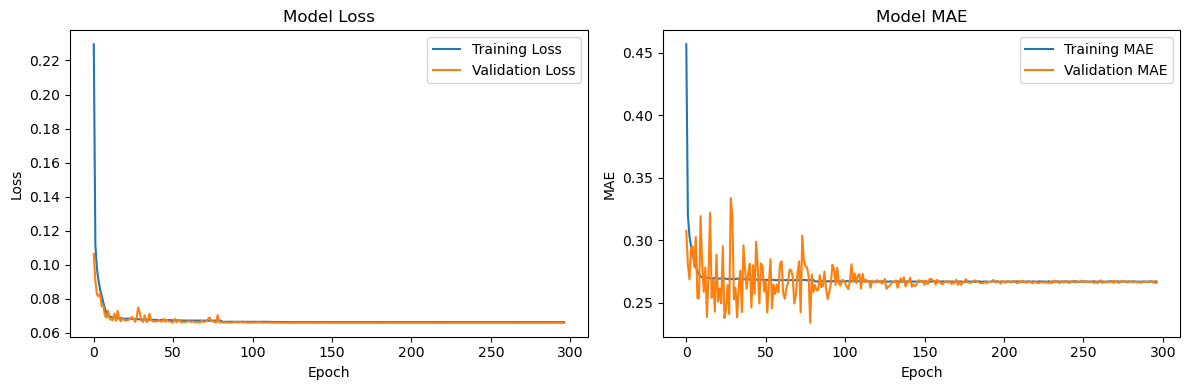

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.regularizers import l2
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load and preprocess the data
print("Loading data...")
file_path = r"C:\Users\Satvik\Downloads\photometric_sfr.csv"
df = pd.read_csv(file_path)

new_column_names = ['DR9_Object_ID', 'Object_ID', 'RA_deg', 'Dec_deg', 'Photometric_Redshift', 'Quality', 'Specific_Star_Formation_Rate']
df.columns = new_column_names

df = df[(df['Photometric_Redshift'] <= 0.33) & (df['Quality'] == 1)]

features = ['RA_deg', 'Dec_deg', 'Photometric_Redshift']
X = df[features]
y = df['Specific_Star_Formation_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Model definition
model = Sequential([
    LSTM(256, input_shape=(1, 3), return_sequences=True, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),
    LSTM(128, return_sequences=True, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),
    LSTM(64, kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=l2(1e-4)),
    Dense(16, activation='relu', kernel_regularizer=l2(1e-4)),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='huber', metrics=['mae'])

# Callbacks
early_stopping = EarlyStopping(patience=100, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=30, min_lr=1e-6)

class ProgressBarCallback(Callback):
    def __init__(self, epochs):
        super().__init__()
        self.epochs = epochs
        self.progbar = None

    def on_train_begin(self, logs=None):
        self.progbar = tqdm(total=self.epochs, unit='epoch')

    def on_epoch_end(self, epoch, logs=None):
        self.progbar.update(1)

    def on_train_end(self, logs=None):
        self.progbar.close()

# Training
print("Training model...")
epochs = 2000  # Increased number of epochs
progress_bar = ProgressBarCallback(epochs)
history = model.fit(
    X_train_reshaped, y_train,
    epochs=epochs,
    batch_size=32,
    validation_split=0.2,
    verbose=0,
    callbacks=[early_stopping, reduce_lr, progress_bar]
)

# Evaluation
print("\nEvaluating model...")
test_loss, test_mae = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')

predictions = model.predict(X_test_reshaped)

# Calculate accuracy with 10% tolerance
accuracy_10 = np.mean(np.abs((predictions.flatten() - y_test) / y_test) <= 0.10) * 100
print(f'Accuracy (within 10% tolerance): {accuracy_10:.2f}%')

print("\nSample predictions:")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = predictions[i][0]
    percentage_error = abs((predicted - actual) / actual) * 100
    print(f'Actual: {actual:.4f}, Predicted: {predicted:.4f}, Percentage Error: {percentage_error:.2f}%')


# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


## SVR

Predicting Specific Star Formation Rate (SFR) Using Support Vector Regression (SVR)
In this section, we implement a Support Vector Regression (SVR) model to predict the Specific Star Formation Rate (SFR) based on photometric data. The process involves several key steps:

Data Loading: We load the dataset and assign meaningful column names. The dataset is filtered to retain only high-quality observations, specifically those with a photometric redshift of 0.33 or less and a quality indicator of 1.

Feature Selection: We identify relevant features for prediction, including Right Ascension (RA), Declination (Dec), and photometric redshift.

Data Splitting: The dataset is divided into training and testing sets using an 80-20 split to ensure we can evaluate the model's performance on unseen data.

Standardization: We standardize the feature values using StandardScaler to bring all features onto a similar scale, which is important for the performance of SVR.

Model Training: An SVR model is created using a radial basis function (RBF) kernel, which is suitable for capturing non-linear relationships. The model is then trained on the scaled training data.

Making Predictions: The trained model makes predictions on the test set.

Evaluation: We evaluate the model's performance using Mean Absolute Error (MAE) and calculate a custom accuracy metric based on a 10% tolerance of the actual values.

Sample Predictions: Finally, we display a few sample predictions alongside their actual values and percentage errors to provide insight into the model's predictive accuracy.

By following this approach, we aim to develop a robust SVR model that can effectively predict SFR based on available photometric features.

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Load the dataset
print("Loading data...")
data = pd.read_csv(r"C:\Users\Satvik\Downloads\photometric_sfr.csv", header=None)

# Add column names
column_names = ['dr9objID', 'objID', 'RAdeg', 'DEdeg', 'photoz', 'Qual', 'SSFR']
data.columns = column_names

# Apply quality constraints
high_quality_data = data[(data['photoz'] <= 0.33) & (data['Qual'] == 1)]

# Separate features and target
X = high_quality_data[['RAdeg', 'DEdeg', 'photoz']]
y = high_quality_data['SSFR']

# Print the number of high-quality objects
print(f"Number of high-quality objects: {len(high_quality_data)}")

# Split into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train SVR model
print("Training SVR model...")
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
print("Making predictions...")
y_pred = svr.predict(X_test_scaled)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {mae}')

# Calculate custom accuracy with 10% tolerance
tolerance = 0.1
accurate_predictions = np.sum(np.abs(y_pred - y_test) <= tolerance * np.abs(y_test))
accuracy = accurate_predictions / len(y_test)
print(f'Custom Accuracy (10% tolerance): {accuracy * 100:.2f}%')

# Print sample predictions
print("\nSample predictions:")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    percentage_error = abs((predicted - actual) / actual) * 100
    print(f'Actual: {actual:.4f}, Predicted: {predicted:.4f}, Percentage Error: {percentage_error:.2f}%')

Loading data...
Number of high-quality objects: 237731
Training SVR model...
Making predictions...
Test MAE: 0.24129482484233417
Custom Accuracy (10% tolerance): 95.63%

Sample predictions:
Actual: -10.8470, Predicted: -10.7208, Percentage Error: 1.16%
Actual: -10.8510, Predicted: -10.7494, Percentage Error: 0.94%
Actual: -10.7089, Predicted: -10.7471, Percentage Error: 0.36%
Actual: -10.5827, Predicted: -10.6526, Percentage Error: 0.66%
Actual: -10.8471, Predicted: -10.7472, Percentage Error: 0.92%


In [ ]:
pip install matplotlib seaborn

Loading data...
Number of high-quality objects: 237731
Training SVR model...
Making predictions...
Test MAE: 0.24129482484233417
Custom Accuracy (10% tolerance): 95.63%

Sample predictions:
Actual: -10.8470, Predicted: -10.7208, Percentage Error: 1.16%
Actual: -10.8510, Predicted: -10.7494, Percentage Error: 0.94%
Actual: -10.7089, Predicted: -10.7471, Percentage Error: 0.36%
Actual: -10.5827, Predicted: -10.6526, Percentage Error: 0.66%
Actual: -10.8471, Predicted: -10.7472, Percentage Error: 0.92%


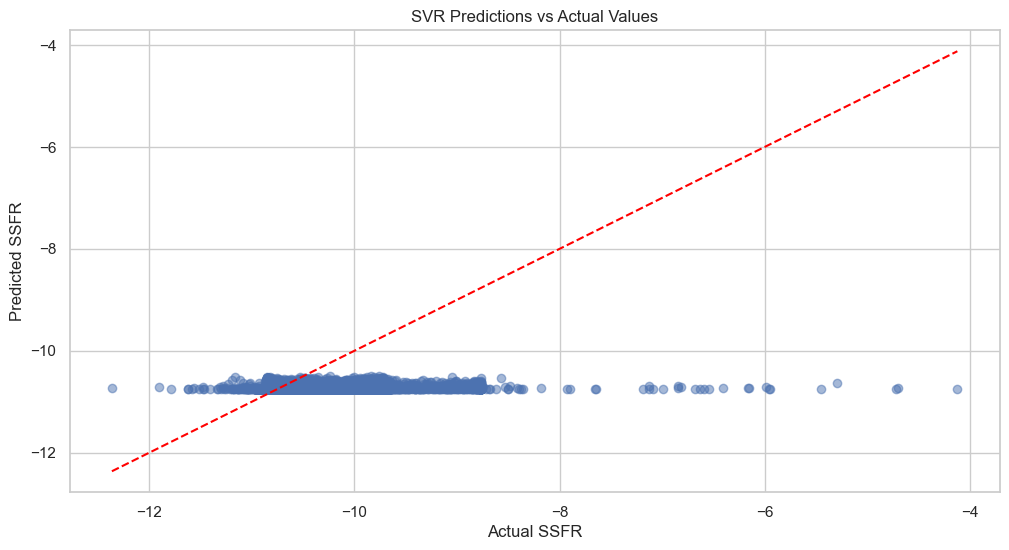

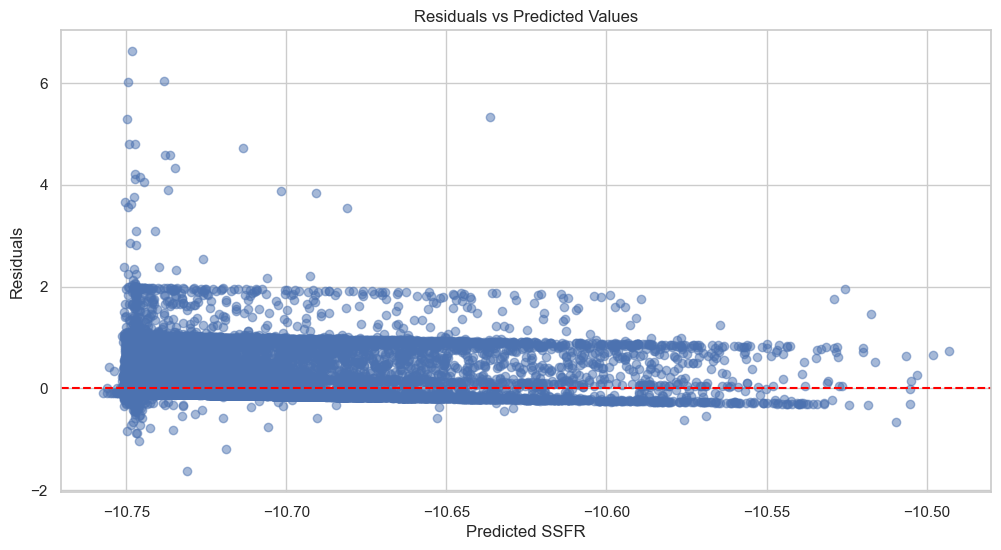

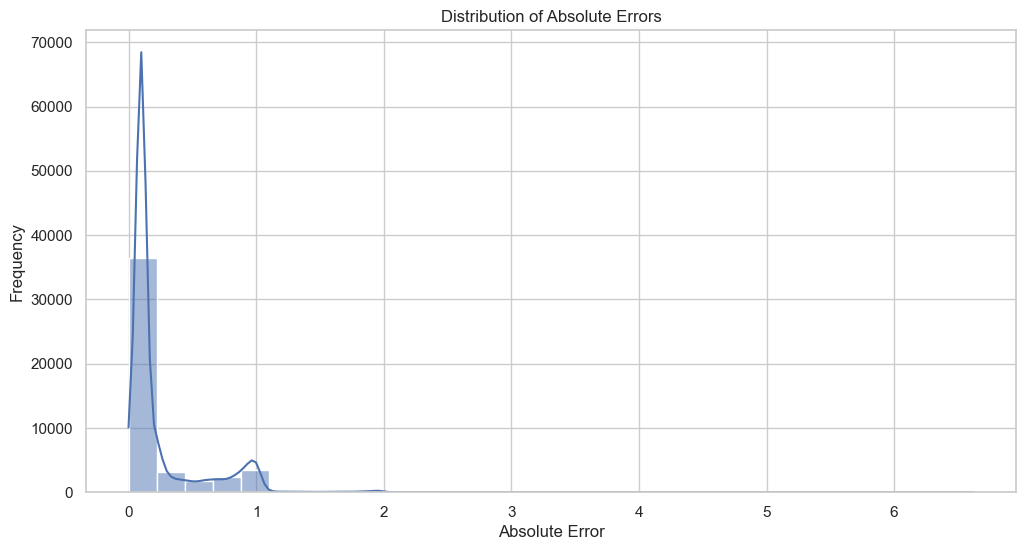

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Ensure plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Load the dataset
print("Loading data...")
data = pd.read_csv(r"C:\Users\Satvik\Downloads\photometric_sfr.csv", header=None)

# Add column names
column_names = ['dr9objID', 'objID', 'RAdeg', 'DEdeg', 'photoz', 'Qual', 'SSFR']
data.columns = column_names

# Apply quality constraints
high_quality_data = data[(data['photoz'] <= 0.33) & (data['Qual'] == 1)]

# Separate features and target
X = high_quality_data[['RAdeg', 'DEdeg', 'photoz']]
y = high_quality_data['SSFR']

# Print the number of high-quality objects
print(f"Number of high-quality objects: {len(high_quality_data)}")

# Split into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train SVR model
print("Training SVR model...")
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
print("Making predictions...")
y_pred = svr.predict(X_test_scaled)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {mae}')

# Calculate custom accuracy with 10% tolerance
tolerance = 0.1
accurate_predictions = np.sum(np.abs(y_pred - y_test) <= tolerance * np.abs(y_test))
accuracy = accurate_predictions / len(y_test)
print(f'Custom Accuracy (10% tolerance): {accuracy * 100:.2f}%')

# Print sample predictions
print("\nSample predictions:")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    percentage_error = abs((predicted - actual) / actual) * 100
    print(f'Actual: {actual:.4f}, Predicted: {predicted:.4f}, Percentage Error: {percentage_error:.2f}%')

# Plotting

# Set style for the plots
sns.set(style="whitegrid")

# Scatter plot of predicted vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual SSFR')
plt.ylabel('Predicted SSFR')
plt.title('SVR Predictions vs Actual Values')
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted SSFR')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

# Distribution of errors
errors = np.abs(residuals)
plt.figure(figsize=(12, 6))
sns.histplot(errors, kde=True, bins=30)
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Errors')
plt.grid(True)
plt.show()


SVR With Grid Search

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# Load the dataset
print("Loading data...")
data = pd.read_csv(r"C:\Users\Satvik\Downloads\photometric_sfr.csv", header=None)

# Add column names
column_names = ['dr9objID', 'objID', 'RAdeg', 'DEdeg', 'photoz', 'Qual', 'SSFR']
data.columns = column_names

# Apply quality constraints
high_quality_data = data[(data['photoz'] <= 0.33) & (data['Qual'] == 1)]

# Separate features and target
X = high_quality_data[['RAdeg', 'DEdeg', 'photoz']]
y = high_quality_data['SSFR']

# Print the number of high-quality objects
print(f"Number of high-quality objects: {len(high_quality_data)}")

# Split into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to calculate custom accuracy
def custom_accuracy(y_true, y_pred, tolerance=0.1):
    return np.mean(np.abs(y_pred - y_true) <= tolerance * np.abs(y_true)) * 100

# Initial SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train and evaluate initial model
print("Training initial SVR model...")
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)
initial_accuracy = custom_accuracy(y_test, y_pred)
print(f"Initial accuracy: {initial_accuracy:.2f}%")

# If accuracy is not 99%, try to improve it
if initial_accuracy < 99:
    print("Attempting to improve accuracy...")
    
    # Feature engineering
    X['RA_DE_product'] = X['RAdeg'] * X['DEdeg']
    X['Redshift_squared'] = X['photoz'] ** 2
    
    # Resplit and scale with new features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define parameter grid for GridSearchCV
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 0.2],
        'kernel': ['rbf', 'linear']
    }
    
    # Perform GridSearchCV with 3-fold cross-validation
    print("Performing GridSearchCV...")
    grid_search = GridSearchCV(SVR(), param_grid, cv=3, n_jobs=-1, verbose=1, scoring=lambda estimator, X, y: custom_accuracy(y, estimator.predict(X)))
    grid_search.fit(X_train_scaled, y_train)
    
    # Get best model
    best_svr = grid_search.best_estimator_
    
    # Make predictions on the test set
    print("Making predictions...")
    y_pred = best_svr.predict(X_test_scaled)
    
    # Calculate final accuracy
    final_accuracy = custom_accuracy(y_test, y_pred)
    print(f"Final accuracy: {final_accuracy:.2f}%")
    
    # Print best parameters
    print("Best parameters:", grid_search.best_params_)
else:
    best_svr = svr
    final_accuracy = initial_accuracy

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {mae}')

# Print sample predictions
print("\nSample predictions:")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    percentage_error = abs((predicted - actual) / actual) * 100
    print(f'Actual: {actual:.4f}, Predicted: {predicted:.4f}, Percentage Error: {percentage_error:.2f}%')

Loading data...
Number of high-quality objects: 237731
Training initial SVR model...
Initial accuracy: 95.63%
Attempting to improve accuracy...
Performing GridSearchCV...
Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\Satvik\AppData\Local\Temp\ipykernel_3740\2851033772.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['RA_DE_product'] = X['RAdeg'] * X['DEdeg']
C:\Users\Satvik\AppData\Local\Temp\ipykernel_3740\2851033772.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Redshift_squared'] = X['photoz'] ** 2


## Linear Regression model

Predicting Specific Star Formation Rate (SFR) Using Linear Regression
In this section, we utilize a Linear Regression model to predict the Specific Star Formation Rate (SFR) from photometric data.

Data Preparation: The dataset is loaded, filtered for high-quality observations, and various new features are engineered to improve model performance.

Feature and Target Selection: We define our feature set, incorporating both original and engineered features, and set SFR as the target variable.

Model Training: The data is split into training and testing sets, standardized, and then used to train a Linear Regression model.

Performance Evaluation: Predictions are evaluated using a custom accuracy metric with a 10% tolerance and the Mean Absolute Error (MAE).

Insights: Sample predictions are displayed alongside actual values and percentage errors, and feature importance is analyzed through model coefficients to understand their contributions.

This structured approach aims to effectively leverage Linear Regression for predicting SFR.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm

# Load the dataset
print("Loading data...")
data = pd.read_csv(r"C:\Users\Satvik\Downloads\photometric_sfr.csv", header=None)

# Add column names
column_names = ['dr9objID', 'objID', 'RAdeg', 'DEdeg', 'photoz', 'Qual', 'SSFR']
data.columns = column_names

# Apply quality constraints
high_quality_data = data[(data['photoz'] <= 0.33) & (data['Qual'] == 1)]

# Feature engineering
print("Performing feature engineering...")
high_quality_data['RA_DE_product'] = high_quality_data['RAdeg'] * high_quality_data['DEdeg']
high_quality_data['Redshift_squared'] = high_quality_data['photoz'] ** 2
high_quality_data['RA_DE_ratio'] = high_quality_data['RAdeg'] / high_quality_data['DEdeg']
high_quality_data['RA_Redshift_product'] = high_quality_data['RAdeg'] * high_quality_data['photoz']
high_quality_data['DE_Redshift_product'] = high_quality_data['DEdeg'] * high_quality_data['photoz']

# Separate features and target
X = high_quality_data[['RAdeg', 'DEdeg', 'photoz', 'RA_DE_product', 'Redshift_squared', 
                       'RA_DE_ratio', 'RA_Redshift_product', 'DE_Redshift_product']]
y = high_quality_data['SSFR']

# Print the number of high-quality objects
print(f"Number of high-quality objects: {len(high_quality_data)}")

# Split into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to calculate custom accuracy
def custom_accuracy(y_true, y_pred, tolerance=0.1):
    return np.mean(np.abs(y_pred - y_true) <= tolerance * np.abs(y_true)) * 100

# Create and train Linear Regression model
print("Training Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
print("Making predictions...")
y_pred = lr_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = custom_accuracy(y_test, y_pred)
print(f"Accuracy (10% tolerance): {accuracy:.2f}%")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {mae}')

# Print sample predictions
print("\nSample predictions:")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    percentage_error = abs((predicted - actual) / actual) * 100
    print(f'Actual: {actual:.4f}, Predicted: {predicted:.4f}, Percentage Error: {percentage_error:.2f}%')

# Feature importance (coefficients)
feature_importance = pd.DataFrame({'feature': X.columns, 'coefficient': lr_model.coef_})
feature_importance['abs_coefficient'] = np.abs(feature_importance['coefficient'])
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)
print("\nFeature Coefficients:")
print(feature_importance)

Loading data...
Performing feature engineering...
Number of high-quality objects: 237731
Training Linear Regression model...


C:\Users\Satvik\AppData\Local\Temp\ipykernel_24128\686517039.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_quality_data['RA_DE_product'] = high_quality_data['RAdeg'] * high_quality_data['DEdeg']
C:\Users\Satvik\AppData\Local\Temp\ipykernel_24128\686517039.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_quality_data['Redshift_squared'] = high_quality_data['photoz'] ** 2
C:\Users\Satvik\AppData\Local\Temp\ipykernel_24128\686517039.py:24: SettingWithCopyWarning: 
A value is trying to be s

Making predictions...
Accuracy (10% tolerance): 98.97%
Test MAE: 0.26842165374979393

Sample predictions:
Actual: -10.8470, Predicted: -10.5223, Percentage Error: 2.99%
Actual: -10.8510, Predicted: -10.8030, Percentage Error: 0.44%
Actual: -10.7089, Predicted: -10.6982, Percentage Error: 0.10%
Actual: -10.5827, Predicted: -10.4401, Percentage Error: 1.35%
Actual: -10.8471, Predicted: -10.6456, Percentage Error: 1.86%

Feature Coefficients:
               feature  coefficient  abs_coefficient
2               photoz     0.067722         0.067722
4     Redshift_squared     0.044347         0.044347
1                DEdeg     0.009081         0.009081
3        RA_DE_product    -0.007706         0.007706
6  RA_Redshift_product     0.007328         0.007328
7  DE_Redshift_product    -0.006414         0.006414
0                RAdeg     0.001147         0.001147
5          RA_DE_ratio     0.000247         0.000247


## Random Forest model

Predicting Specific Star Formation Rate (SFR) Using Random Forest Regression
In this section, we implement a Random Forest Regressor to predict the Specific Star Formation Rate (SFR) using photometric data.

Data Preparation: We load the dataset and filter it for high-quality observations with a photometric redshift of 0.33 or less.

Feature Engineering: New features are created to enhance model performance, including products and ratios of existing features.

Model Training: After splitting the data into training and testing sets and standardizing the features, we train the Random Forest model with specified hyperparameters.

Performance Evaluation: The model’s predictions are assessed using a custom accuracy metric based on a 10% tolerance and the Mean Absolute Error (MAE).

Insights: We display sample predictions and calculate feature importances to identify which features are most influential in predicting SFR.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm

# Load the dataset
print("Loading data...")
data = pd.read_csv(r"C:\Users\Satvik\Downloads\photometric_sfr.csv", header=None)

# Add column names
column_names = ['dr9objID', 'objID', 'RAdeg', 'DEdeg', 'photoz', 'Qual', 'SSFR']
data.columns = column_names

# Apply quality constraints
high_quality_data = data[(data['photoz'] <= 0.33) & (data['Qual'] == 1)]

# Feature engineering
print("Performing feature engineering...")
high_quality_data['RA_DE_product'] = high_quality_data['RAdeg'] * high_quality_data['DEdeg']
high_quality_data['Redshift_squared'] = high_quality_data['photoz'] ** 2
high_quality_data['RA_DE_ratio'] = high_quality_data['RAdeg'] / high_quality_data['DEdeg']
high_quality_data['RA_Redshift_product'] = high_quality_data['RAdeg'] * high_quality_data['photoz']
high_quality_data['DE_Redshift_product'] = high_quality_data['DEdeg'] * high_quality_data['photoz']

# Separate features and target
X = high_quality_data[['RAdeg', 'DEdeg', 'photoz', 'RA_DE_product', 'Redshift_squared', 
                       'RA_DE_ratio', 'RA_Redshift_product', 'DE_Redshift_product']]
y = high_quality_data['SSFR']

# Print the number of high-quality objects
print(f"Number of high-quality objects: {len(high_quality_data)}")

# Split into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to calculate custom accuracy
def custom_accuracy(y_true, y_pred, tolerance=0.1):
    return np.mean(np.abs(y_pred - y_true) <= tolerance * np.abs(y_true)) * 100

# Create and train Random Forest model
print("Training Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, 
                                 min_samples_leaf=2, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
print("Making predictions...")
y_pred = rf_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = custom_accuracy(y_test, y_pred)
print(f"Accuracy (10% tolerance): {accuracy:.2f}%")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {mae}')

# Print sample predictions
print("\nSample predictions:")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    percentage_error = abs((predicted - actual) / actual) * 100
    print(f'Actual: {actual:.4f}, Predicted: {predicted:.4f}, Percentage Error: {percentage_error:.2f}%')

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

Loading data...
Performing feature engineering...
Number of high-quality objects: 237731


C:\Users\Satvik\AppData\Local\Temp\ipykernel_24128\3352659431.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_quality_data['RA_DE_product'] = high_quality_data['RAdeg'] * high_quality_data['DEdeg']
C:\Users\Satvik\AppData\Local\Temp\ipykernel_24128\3352659431.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_quality_data['Redshift_squared'] = high_quality_data['photoz'] ** 2
C:\Users\Satvik\AppData\Local\Temp\ipykernel_24128\3352659431.py:24: SettingWithCopyWarning: 
A value is trying to b

Training Random Forest model...
Making predictions...
Accuracy (10% tolerance): 98.92%
Test MAE: 0.2652389304299632

Sample predictions:
Actual: -10.8470, Predicted: -10.4901, Percentage Error: 3.29%
Actual: -10.8510, Predicted: -10.7370, Percentage Error: 1.05%
Actual: -10.7089, Predicted: -10.7156, Percentage Error: 0.06%
Actual: -10.5827, Predicted: -10.4787, Percentage Error: 0.98%
Actual: -10.8471, Predicted: -10.6856, Percentage Error: 1.49%

Feature Importance:
               feature  importance
4     Redshift_squared    0.336903
2               photoz    0.325693
0                RAdeg    0.082441
6  RA_Redshift_product    0.069465
5          RA_DE_ratio    0.050874
3        RA_DE_product    0.049055
7  DE_Redshift_product    0.046179
1                DEdeg    0.039391


## Gradient Boosting

Predicting Specific Star Formation Rate (SFR) Using Gradient Boosting Regression
In this section, we implement a Gradient Boosting Regressor to predict the Specific Star Formation Rate (SFR) based on photometric data.

Data Preparation: The dataset is loaded and filtered to include high-quality observations with a photometric redshift of 0.33 or less.

Feature and Target Selection: The relevant features (RA, Dec, and photometric redshift) are extracted alongside the target variable (SFR).

Train-Test Split: The data is split into training and testing sets to facilitate model evaluation.

Hyperparameter Tuning: We define a parameter grid for the Gradient Boosting model and perform a grid search using cross-validation to identify the best hyperparameters.

Model Evaluation: The optimal model is evaluated on the test set, and metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are calculated.

Accuracy Assessment: The model’s accuracy is assessed based on a defined tolerance level, indicating the percentage of predictions that fall within this range of actual values.

Sample Predictions: A few sample predictions are displayed alongside actual values, and percentage errors are calculated to provide insights into model performance.

Contamination Warning: A note is included to highlight potential contamination in the dataset due to the use of photometric redshifts.

This structured approach leverages the power of Gradient Boosting Regression to effectively predict SFR.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load and preprocess data
print("Loading data...")
df = pd.read_csv(r"C:\Users\Satvik\Downloads\photometric_sfr.csv", header=None)

# Add column names
column_names = ['dr9objID', 'objID', 'RAdeg', 'DEdeg', 'photoz', 'Qual', 'SSFR']
df.columns = column_names

# Apply filters for high-quality data
df_filtered = df[(df['photoz'] <= 0.33) & (df['Qual'] == 1)]

features = ['RAdeg', 'DEdeg', 'photoz']
target = 'SSFR'

X = df_filtered[features].values
y = df_filtered[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting model and parameter grid for hyperparameter tuning
gb_model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Perform the hyperparameter search
grid_search.fit(X_train, y_train)

# Get the best model
best_gb_model = grid_search.best_estimator_

# Evaluate the best model
predictions = best_gb_model.predict(X_test)

# Calculate accuracy metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Define tolerance level (10% of actual values)
tolerance = 0.1

# Calculate accuracy with tolerance
within_tolerance = np.abs(predictions - y_test) <= tolerance * np.abs(y_test)
accuracy_with_tolerance = np.mean(within_tolerance) * 100

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Accuracy (within {tolerance*100:.2f}% of actual values): {accuracy_with_tolerance:.2f}%")

# Print some sample predictions vs actual values
for i in range(10):
    print(f"Predicted: {predictions[i]:.4f}, Actual: {y_test[i]:.4f}, Within Tolerance: {within_tolerance[i]}")

# Calculate percentage error for each prediction (in linear scale)
percent_errors = (1 - predictions / y_test) * 100

# Print mean and median percentage errors
print(f"Mean Percentage Error: {np.mean(np.abs(percent_errors)):.2f}%")
print(f"Median Percentage Error: {np.median(np.abs(percent_errors)):.2f}%")

# Print contamination warning
print("\nNote: Due to the use of photometric redshifts, there may be approximately 1.33% contamination")
print("in the dataset from galaxies with true redshifts higher than 0.33.")


Loading data...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Absolute Error: 0.2654
Root Mean Squared Error: 0.3718
Accuracy (within 10.00% of actual values): 98.94%
Predicted: -10.4918, Actual: -10.8470, Within Tolerance: True
Predicted: -10.7537, Actual: -10.8510, Within Tolerance: True
Predicted: -10.7246, Actual: -10.7089, Within Tolerance: True
Predicted: -10.4245, Actual: -10.5827, Within Tolerance: True
Predicted: -10.6709, Actual: -10.8471, Within Tolerance: True
Predicted: -10.6915, Actual: -10.8471, Within Tolerance: True
Predicted: -10.7060, Actual: -9.7764, Within Tolerance: True
Predicted: -10.5349, Actual: -10.4442, Within Tolerance: True
Predicted: -10.4575, Actual: -10.7277, Within Tolerance: True
Predicted: -10.6650, Actual: -10.4440, Within Tolerance: True
Mean Percentage Error: 2.59%
Median Percentage Error: 1.68%

Note: Due to the use of photometric redshifts, there may be approximately 1.33% contamination
in the dataset from galaxies with true

## Decision Trees

Predicting Specific Star Formation Rate (SFR) Using Decision Tree Regression
This section focuses on using a Decision Tree Regressor to predict the Specific Star Formation Rate (SFR) from photometric data.

Data Loading and Preparation: The dataset is loaded, and relevant column names are assigned. Quality constraints are applied to filter for high-quality observations (photometric redshift ≤ 0.33 and quality flag = 1).

Feature and Target Selection: The dataset is divided into features (RA, Dec, and photometric redshift) and the target variable (SFR). The number of high-quality observations is printed.

Train-Validation Split: The data is split into training and validation sets to assess model performance.

Data Standardization: The features are standardized using StandardScaler to improve the model's performance.

Model Training: A Decision Tree Regressor is instantiated and trained on the training set, with progress displayed using a progress bar.

Prediction and Evaluation: Predictions are made on the validation set, and the Mean Absolute Error (MAE) is calculated to quantify model performance.

Accuracy Assessment: Custom accuracy is calculated based on a defined tolerance level (10%), indicating the percentage of predictions that fall within this range of actual values.

Feature Importance Visualization: The feature importances are extracted and visualized in a bar chart, providing insights into which features have the most influence on the model's predictions.

This structured approach demonstrates the application of Decision Tree Regression to effectively predict SFR while emphasizing model evaluation and interpretability through feature importance.

Index(['dr9objID', 'objID', 'RAdeg', 'DEdeg', 'photoz', 'Qual', 'SSFR'], dtype='object')
Number of high-quality objects: 237731


Training Model: 100%|██████████| 1/1 [00:03<00:00,  3.60s/it]


Making Predictions...
Validation MAE: 0.3206
Custom Accuracy (within 10% of actual values): 91.58%


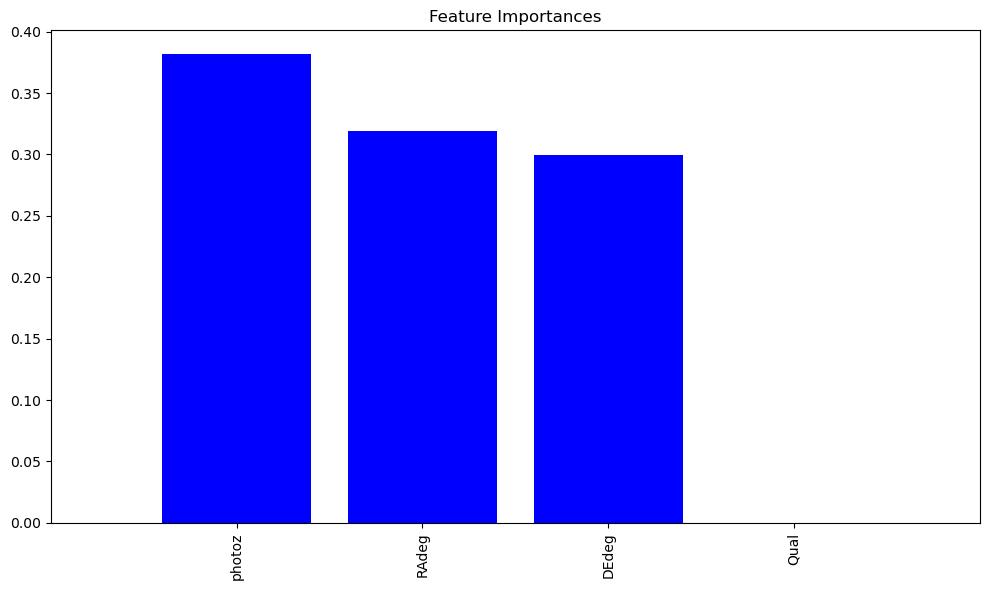

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm

# Load the dataset
data = pd.read_csv(r"C:\Users\Satvik\Downloads\photometric_sfr.csv", header=None)

# Add column names
column_names = ['dr9objID', 'objID', 'RAdeg', 'DEdeg', 'photoz', 'Qual', 'SSFR']
data.columns = column_names

# Print the column names to check
print(data.columns)

# Apply quality constraints
high_quality_data = data[(data['photoz'] <= 0.33) & (data['Qual'] == 1)]

# Separate features and target
X = high_quality_data.drop(columns=['dr9objID', 'objID', 'SSFR'])
y = high_quality_data['SSFR']

# Print the number of high-quality objects
print(f"Number of high-quality objects: {len(high_quality_data)}")

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Create the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model with a progress bar
for _ in tqdm(range(1), desc="Training Model"):
    dt_regressor.fit(X_train, y_train)

# Make predictions on the validation set
tqdm.write("Making Predictions...")
y_pred = dt_regressor.predict(X_val)

# Calculate MAE
mae = mean_absolute_error(y_val, y_pred)
print(f'Validation MAE: {mae:.4f}')

# Calculate custom accuracy
tolerance = 0.1  # Define tolerance (10%)
accurate_predictions = np.sum(np.abs(y_pred - y_val) <= tolerance * np.abs(y_val))
accuracy = accurate_predictions / len(y_val)
print(f'Custom Accuracy (within {tolerance*100:.0f}% of actual values): {accuracy * 100:.2f}%')

# Visualizing feature importance
importances = dt_regressor.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


C:\Users\Satvik\AppData\Local\Temp\ipykernel_12184\2217709536.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_quality_data['RA_DE_ratio'] = high_quality_data['RAdeg'] / high_quality_data['DEdeg']
C:\Users\Satvik\AppData\Local\Temp\ipykernel_12184\2217709536.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_quality_data['photoz_squared'] = high_quality_data['photoz'] ** 2


Number of high-quality objects: 237731


Hyperparameter Tuning:   0%|          | 0/135 [00:00<?, ?it/s]C:\Users\Satvik\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
208 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Satvik\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Satvik\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Satvik\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_param

Making Predictions...
Validation MAE: 0.2887
Custom Accuracy (within 10% of actual values): 98.88%


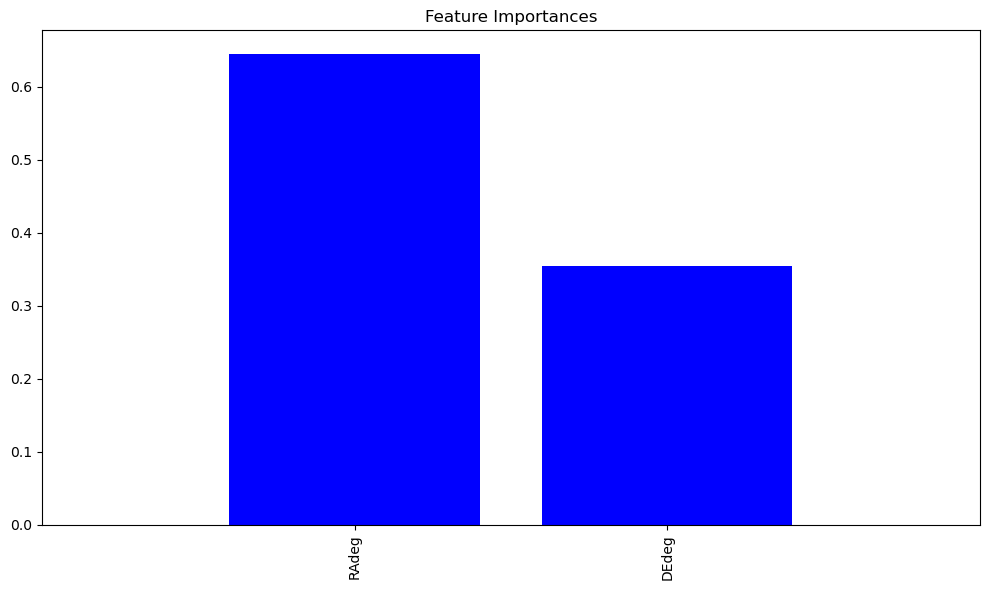

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectFromModel
from tqdm import tqdm

# Load the dataset
data = pd.read_csv(r"C:\Users\Satvik\Downloads\photometric_sfr.csv", header=None)
column_names = ['dr9objID', 'objID', 'RAdeg', 'DEdeg', 'photoz', 'Qual', 'SSFR']
data.columns = column_names

# Apply quality constraints
high_quality_data = data[(data['photoz'] <= 0.33) & (data['Qual'] == 1)]

# Feature engineering
high_quality_data['RA_DE_ratio'] = high_quality_data['RAdeg'] / high_quality_data['DEdeg']
high_quality_data['photoz_squared'] = high_quality_data['photoz'] ** 2

# Separate features and target
X = high_quality_data.drop(columns=['dr9objID', 'objID', 'SSFR', 'Qual'])
y = high_quality_data['SSFR']

print(f"Number of high-quality objects: {len(high_quality_data)}")

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Feature selection using Random Forest
rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)
selector = SelectFromModel(rf_selector, prefit=False)
selector.fit(X_train_scaled, y_train)
X_train_selected = selector.transform(X_train_scaled)
X_val_selected = selector.transform(X_val_scaled)

# Hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with tqdm
with tqdm(total=len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['max_features']), desc="Hyperparameter Tuning") as pbar:
    grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_selected, y_train)
    pbar.update(len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['max_features']))

best_dt = grid_search.best_estimator_

# Make predictions on the validation set
print("Making Predictions...")
y_pred = best_dt.predict(X_val_selected)

# Calculate MAE
mae = mean_absolute_error(y_val, y_pred)
print(f'Validation MAE: {mae:.4f}')

# Calculate custom accuracy
tolerance = 0.1  # Define tolerance (10%)
accurate_predictions = np.sum(np.abs(y_pred - y_val) <= tolerance * np.abs(y_val))
accuracy = accurate_predictions / len(y_val)
print(f'Custom Accuracy (within {tolerance*100:.0f}% of actual values): {accuracy * 100:.2f}%')

# Visualizing feature importance
importances = best_dt.feature_importances_
feature_names = X.columns[selector.get_support()]

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], color='b', align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()

# Print best parameters
print("Best parameters:", grid_search.best_params_)


## Classical Deep learning (Neural Networks)

Predicting Specific Star Formation Rate (SFR) Using Neural Networks
This section implements a neural network model to predict the Specific Star Formation Rate (SFR) from photometric data.

Data Loading and Quality Filtering: The dataset is loaded, and relevant columns are assigned. A less strict quality filter is applied to retain more data, focusing on observations with a photometric redshift of ≤ 0.5 and a quality score of ≥ 0.5.

Feature Engineering: New features are created to enhance model performance, including:

The ratio of right ascension to declination.
The square of the photometric redshift.
The product of right ascension and declination.
The logarithm of the photometric redshift.
Data Preparation: Features (excluding identifiers and the target variable) and the target (SFR) are separated. The dataset is split into training, validation, and test sets. The features are standardized using StandardScaler.

Model Building: A Sequential neural network model is defined with multiple Dense layers, Batch Normalization, and Dropout for regularization. A custom loss function is used, combining Mean Absolute Error (MAE) and a weighted Mean Squared Error (MSE).

Model Training: The model is trained with a progress bar to visualize the epochs. Early stopping and learning rate reduction callbacks help to optimize the training process.

Model Evaluation: After training, the model's performance is evaluated on the test set. Metrics calculated include:

Mean Absolute Error (MAE)
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
R-squared value (R²)
Custom Accuracy Assessment: A custom accuracy metric is computed, indicating the percentage of predictions falling within a specified tolerance (10%) of actual values.

Training History Visualization: The training and validation loss over epochs are plotted to assess the model's learning progress.

Feature Importance Calculation: A method to evaluate feature importance is implemented, showing how each feature affects the model's predictions. The results are plotted to visualize the relative importance of each feature.

This structured approach highlights the use of neural networks for regression tasks, emphasizing model evaluation and interpretability through feature importance analysis.

Loading data...


C:\Users\Satvik\AppData\Local\Temp\ipykernel_12184\1076293397.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_quality_data['RA_DE_ratio'] = high_quality_data['RAdeg'] / high_quality_data['DEdeg']
C:\Users\Satvik\AppData\Local\Temp\ipykernel_12184\1076293397.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_quality_data['photoz_squared'] = high_quality_data['photoz'] ** 2
C:\Users\Satvik\AppData\Local\Temp\ipykernel_12184\1076293397.py:32: SettingWithCopyWarning: 
A value is trying to be se

Number of high-quality objects: 1026601


C:\Users\Satvik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model...


Training Epochs: 100%|██████████| 200/200 [2:05:05<00:00, 37.53s/it] 


Evaluating model...
4813/4813 ━━━━━━━━━━━━━━━━━━━━ 5s 998us/step
Test MAE: 0.3541
Test MSE: 372.7047
Test RMSE: 19.3056
R-squared: -1906.9618
Custom Accuracy (within 10% of actual values): 88.65%


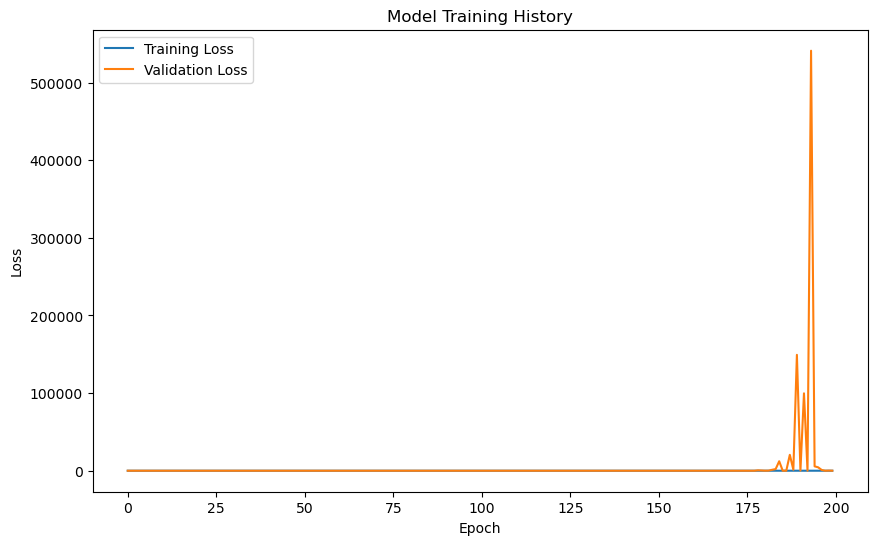

4813/4813 ━━━━━━━━━━━━━━━━━━━━ 4s 878us/step
4813/4813 ━━━━━━━━━━━━━━━━━━━━ 4s 800us/step
4813/4813 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
4813/4813 ━━━━━━━━━━━━━━━━━━━━ 5s 934us/step
4813/4813 ━━━━━━━━━━━━━━━━━━━━ 4s 841us/step
4813/4813 ━━━━━━━━━━━━━━━━━━━━ 4s 906us/step
4813/4813 ━━━━━━━━━━━━━━━━━━━━ 4s 841us/step
4813/4813 ━━━━━━━━━━━━━━━━━━━━ 4s 842us/step


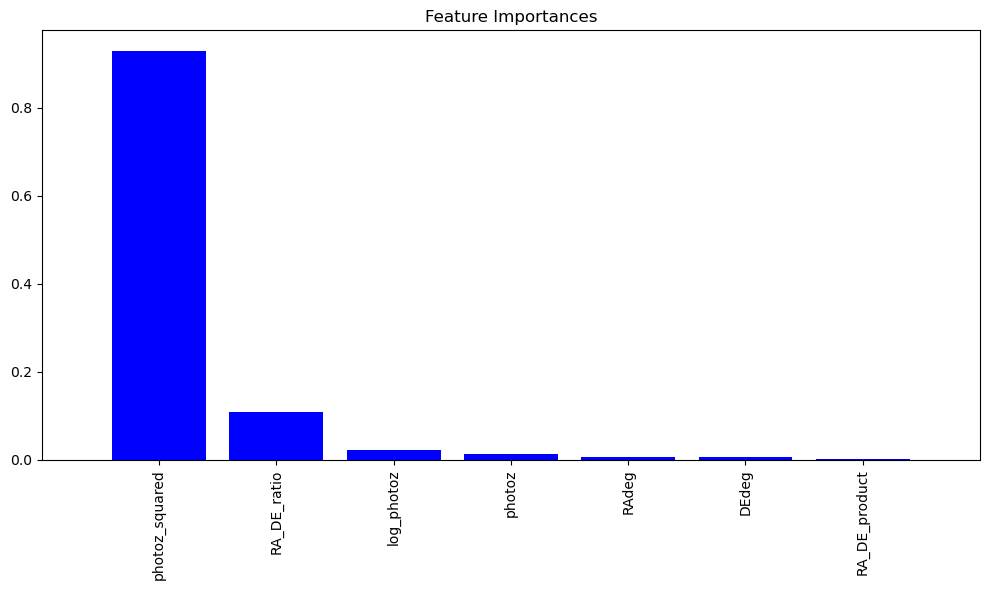

Done!


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import backend as K
from tqdm import tqdm

# Custom loss function
def custom_loss(y_true, y_pred):
    mae = K.mean(K.abs(y_true - y_pred))
    mse = K.mean(K.square(y_true - y_pred))
    return mae + 0.1 * mse

# Load the dataset
print("Loading data...")
data = pd.read_csv(r"C:\Users\Satvik\Downloads\photometric_sfr.csv", header=None)
column_names = ['dr9objID', 'objID', 'RAdeg', 'DEdeg', 'photoz', 'Qual', 'SSFR']
data.columns = column_names

# Apply less strict quality constraints
high_quality_data = data[(data['photoz'] <= 0.5) & (data['Qual'] >= 0.5)]

# Feature engineering
high_quality_data['RA_DE_ratio'] = high_quality_data['RAdeg'] / high_quality_data['DEdeg']
high_quality_data['photoz_squared'] = high_quality_data['photoz'] ** 2
high_quality_data['RA_DE_product'] = high_quality_data['RAdeg'] * high_quality_data['DEdeg']
high_quality_data['log_photoz'] = np.log1p(high_quality_data['photoz'])

# Separate features and target
X = high_quality_data.drop(columns=['dr9objID', 'objID', 'SSFR', 'Qual'])
y = high_quality_data['SSFR']

print(f"Number of high-quality objects: {len(high_quality_data)}")

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the model
def build_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss=custom_loss)
    return model

# Create and train the model with progress bar
print("Training model...")
model = build_model(X_train_scaled.shape[1])
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=0.00001)

epochs = 200
batch_size = 64

# Using tqdm for the training loop
history = {'loss': [], 'val_loss': []}
for epoch in tqdm(range(epochs), desc="Training Epochs"):
    h = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_val_scaled, y_val),
        epochs=1,
        batch_size=batch_size,
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )
    history['loss'].extend(h.history['loss'])
    history['val_loss'].extend(h.history['val_loss'])

# Evaluate the model
print("Evaluating model...")
y_pred = model.predict(X_test_scaled)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Test MAE: {mae:.4f}')
print(f'Test MSE: {mse:.4f}')
print(f'Test RMSE: {rmse:.4f}')
print(f'R-squared: {r2:.4f}')

# Calculate custom accuracy
tolerance = 0.1  # Define tolerance (10%)
accurate_predictions = np.sum(np.abs(y_pred.flatten() - y_test) <= tolerance * np.abs(y_test))
accuracy = accurate_predictions / len(y_test)
print(f'Custom Accuracy (within {tolerance*100:.0f}% of actual values): {accuracy * 100:.2f}%')

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Function to calculate feature importance
def get_feature_importance(model, X):
    original_pred = model.predict(X)
    importance = []
    for i in range(X.shape[1]):
        temp = X.copy()
        temp[:, i] = 0
        new_pred = model.predict(temp)
        importance.append(np.mean(np.abs(original_pred - new_pred)))
    return np.array(importance)

# Calculate and plot feature importance
feature_importance = get_feature_importance(model, X_test_scaled)
feature_names = X.columns

# Sort features by importance
indices = np.argsort(feature_importance)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importance)), feature_importance[indices], color='b', align='center')
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, len(feature_importance)])
plt.tight_layout()
plt.show()

print("Done!")

#### second Project

# Advanced Prediction of Specific Star Formation rate (SSFR) using Synthetic Dara and Machine Learning Tools

This code performs data preprocessing for predicting the Specific Star Formation Rate (SSFR) using synthetic data. It begins by loading the dataset and exploring its structure, including checking for missing values and generating summary statistics. Visualization techniques such as distribution plots, correlation heatmaps, and scatter plots help identify relationships and outliers. The code includes functions to handle outliers using the IQR method, calculate skewness, and apply a Power Transformation to normalize the data. Missing values are imputed using K-Nearest Neighbors. Feature importance is assessed through mutual information, and the dataset is split into training and testing sets for model evaluation. Finally, the preprocessed data is saved for future use

Data shape: (1048576, 7)

Data types:
dr9objID    float64
objID       float64
RAdeg       float64
DEdeg       float64
photoz      float64
Qual          int64
SSFR        float64
dtype: object

Missing values:
dr9objID    0
objID       0
RAdeg       0
DEdeg       0
photoz      0
Qual        0
SSFR        0
dtype: int64

Summary statistics:
           dr9objID         objID         RAdeg         DEdeg        photoz  \
count  1.048576e+06  1.048576e+06  1.048576e+06  1.048576e+06  1.048576e+06   
mean   1.237659e+18  5.901346e+17  1.755969e+02  9.164913e-01  2.554681e-01   
std    9.624570e+12  1.931499e+16  9.662313e+01  6.147396e-01  1.209255e-01   
min    1.237646e+18  5.877230e+17  5.810000e-04 -1.130000e-04  9.400000e-05   
25%    1.237651e+18  5.877260e+17  1.310097e+02  4.129380e-01  1.536837e-01   
50%    1.237655e+18  5.877312e+17  1.808496e+02  8.415075e-01  2.660750e-01   
75%    1.237664e+18  5.880155e+17  2.218453e+02  1.308127e+00  3.446820e-01   
max    1.237680e+18  7.5888

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\output\\distribution_plots.png'

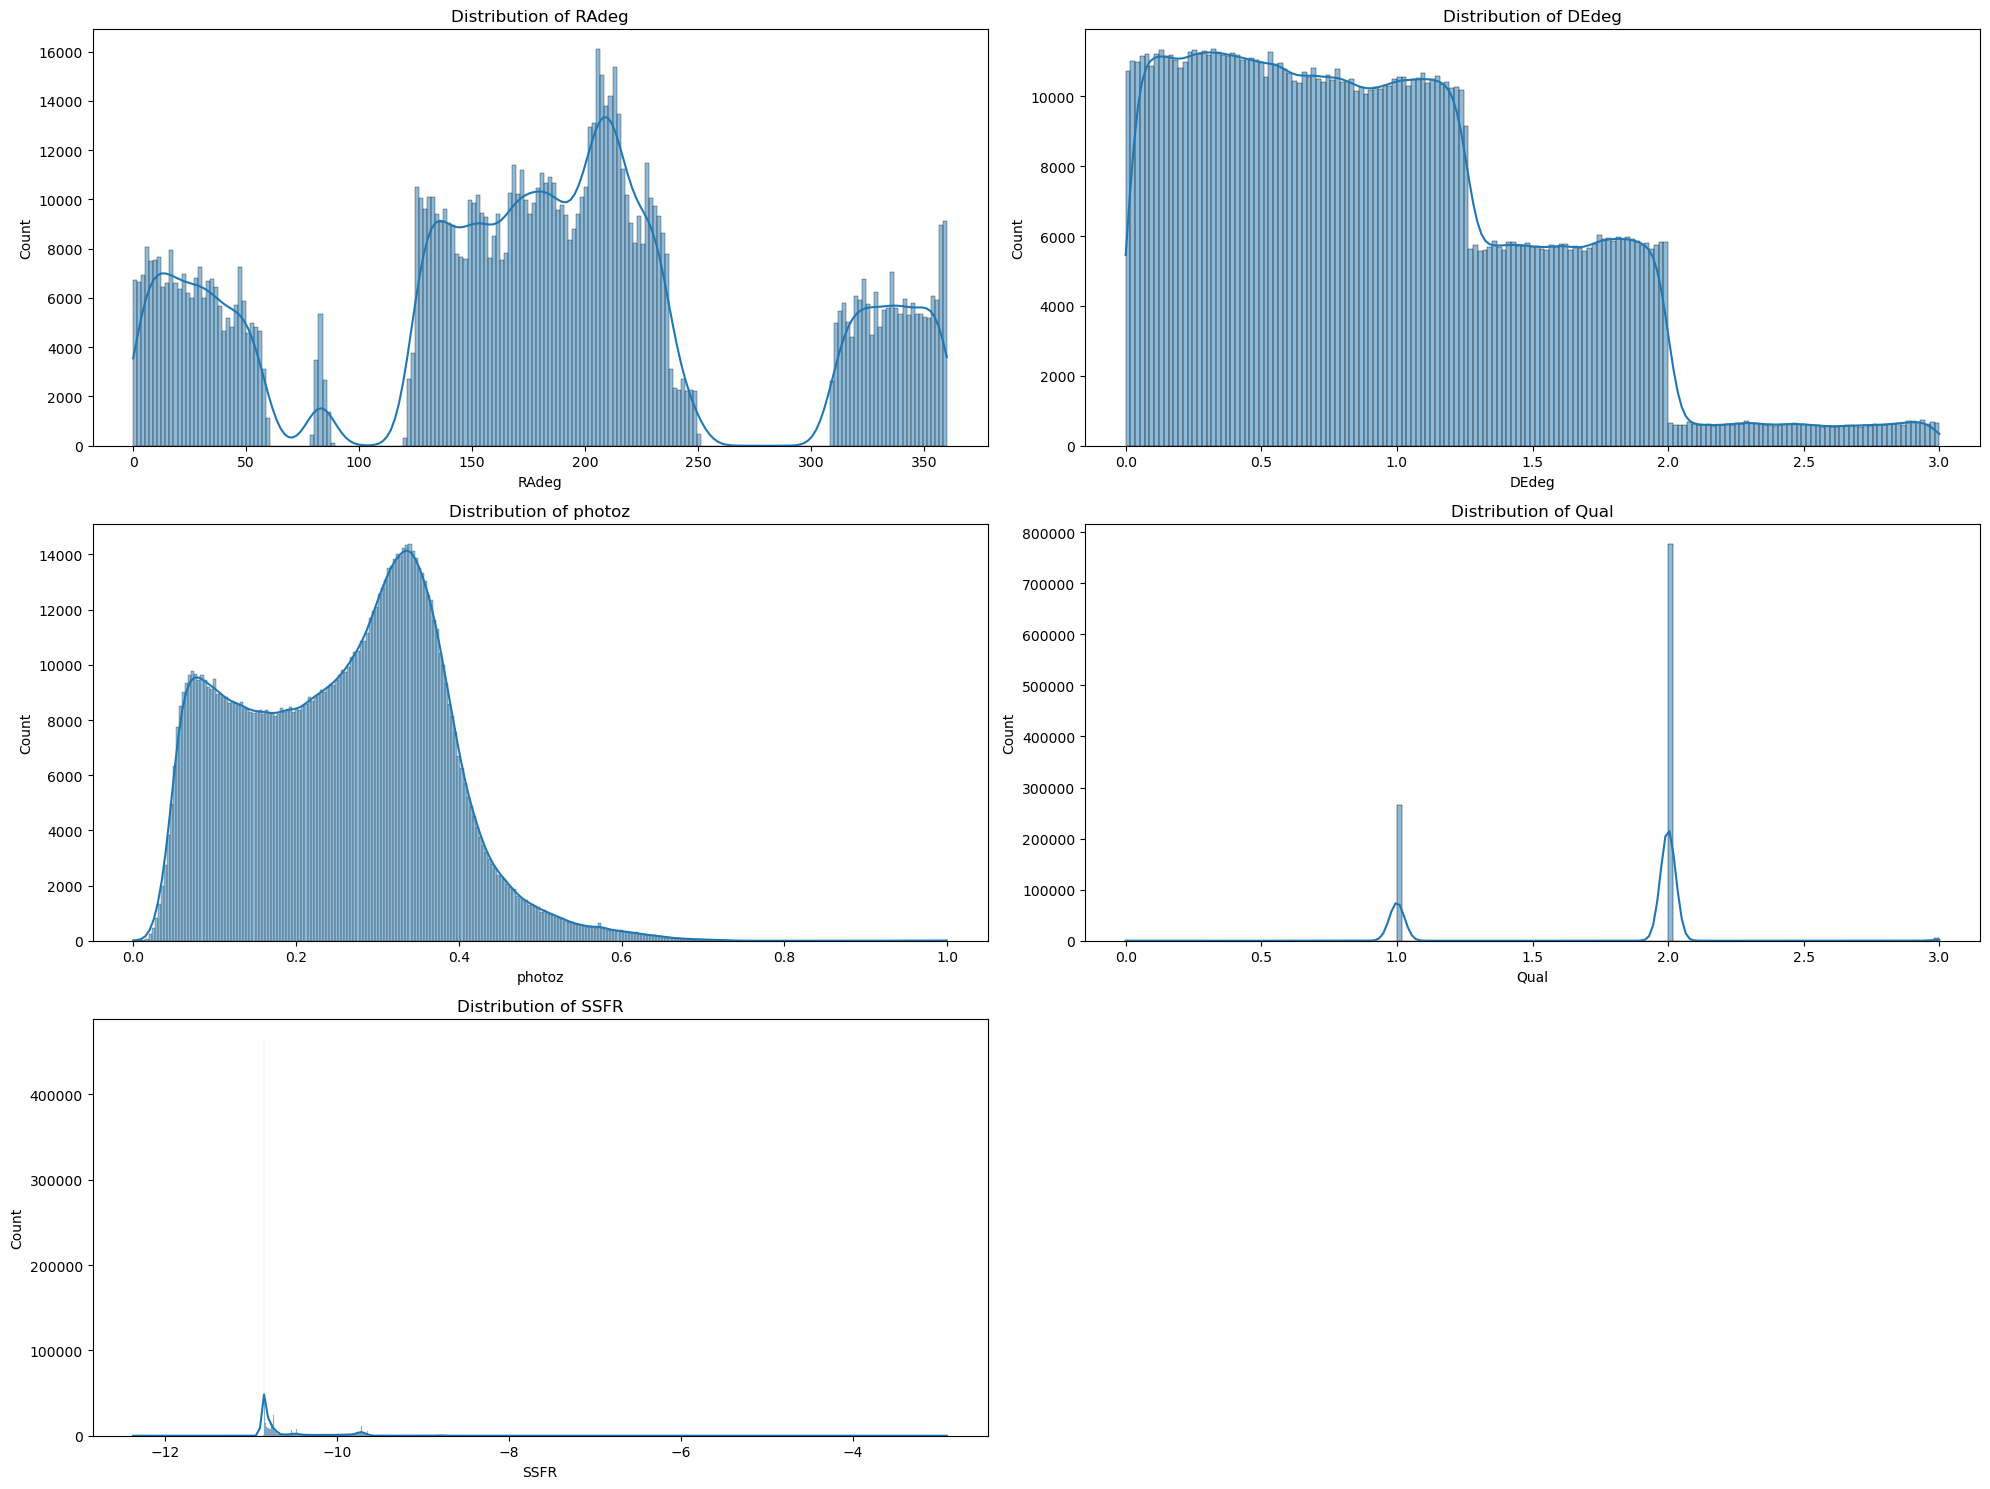

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

# Load the data
file_path = r"C:\Users\Satvik\Downloads\photometric_sfr.csv"
df = pd.read_csv(file_path, header=None)
df.columns = ['dr9objID', 'objID', 'RAdeg', 'DEdeg', 'photoz', 'Qual', 'SSFR']

print("Data shape:", df.shape)
print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print("\nSummary statistics:")
print(df.describe())

# Distribution plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[2:], 1):  # Exclude ID columns
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig(r"D:\output\distribution_plots.png")  # Save distribution plots
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, 2:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig(r"D:\output\correlation_heatmap.png")  # Save heatmap
plt.show()

# Scatter plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[2:-1], 1):  # Exclude ID columns and target
    plt.subplot(2, 2, i)
    plt.scatter(df[col], df['SSFR'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('SSFR')
    plt.title(f'{col} vs SSFR')
plt.tight_layout()
plt.savefig(r"D:\output\scatter_plots.png")  # Save scatter plots
plt.show()

# Check for outliers
def plot_boxplot(df, col):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.savefig(f"D:\\output\\boxplot_{col}.png")  # Save boxplot
    plt.show()

for col in df.columns[2:]:  # Exclude ID columns
    plot_boxplot(df, col)

# Function to calculate skewness
def calculate_skewness(df):
    skewness = df.skew()
    print("Skewness:")
    print(skewness)
    return skewness

skewness = calculate_skewness(df.iloc[:, 2:])  # Exclude ID columns

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Handle outliers for numerical columns
for col in df.columns[2:]:  # Exclude ID columns
    df = handle_outliers(df, col)

print("\nAfter handling outliers:")
print(df.describe())

# Check skewness after handling outliers
skewness_after = calculate_skewness(df.iloc[:, 2:])  # Exclude ID columns

# Apply Power Transform to handle skewness
pt = PowerTransformer(method='yeo-johnson', standardize=True)
df_transformed = pd.DataFrame(pt.fit_transform(df.iloc[:, 2:]), columns=df.columns[2:])

print("\nAfter Power Transform:")
print(df_transformed.describe())

# Check skewness after Power Transform
skewness_pt = calculate_skewness(df_transformed)

# Impute missing values if any
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_transformed), columns=df_transformed.columns)

print("\nAfter imputation:")
print(df_imputed.isnull().sum())

# Feature importance using mutual information
X = df_imputed.drop('SSFR', axis=1)
y = df_imputed['SSFR']

mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
mi_scores.plot.bar()
plt.title('Feature Importance based on Mutual Information')
plt.tight_layout()
plt.savefig(r"D:\output\feature_importance.png")  # Save feature importance plot
plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Save preprocessed data
df_preprocessed = pd.concat([X, y], axis=1)
df_preprocessed.to_csv(r"D:\output\preprocessed_data.csv", index=False)
print("\nPreprocessed data saved to 'D:\\output\\preprocessed_data.csv'")


Data shape: (1048576, 7)

Data types:
dr9objID    float64
objID       float64
RAdeg       float64
DEdeg       float64
photoz      float64
Qual          int64
SSFR        float64
dtype: object

Missing values:
dr9objID    0
objID       0
RAdeg       0
DEdeg       0
photoz      0
Qual        0
SSFR        0
dtype: int64

Summary statistics:
           dr9objID         objID         RAdeg         DEdeg        photoz  \
count  1.048576e+06  1.048576e+06  1.048576e+06  1.048576e+06  1.048576e+06   
mean   1.237659e+18  5.901346e+17  1.755969e+02  9.164913e-01  2.554681e-01   
std    9.624570e+12  1.931499e+16  9.662313e+01  6.147396e-01  1.209255e-01   
min    1.237646e+18  5.877230e+17  5.810000e-04 -1.130000e-04  9.400000e-05   
25%    1.237651e+18  5.877260e+17  1.310097e+02  4.129380e-01  1.536837e-01   
50%    1.237655e+18  5.877312e+17  1.808496e+02  8.415075e-01  2.660750e-01   
75%    1.237664e+18  5.880155e+17  2.218453e+02  1.308127e+00  3.446820e-01   
max    1.237680e+18  7.5888

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\output\\distribution_plots.png'

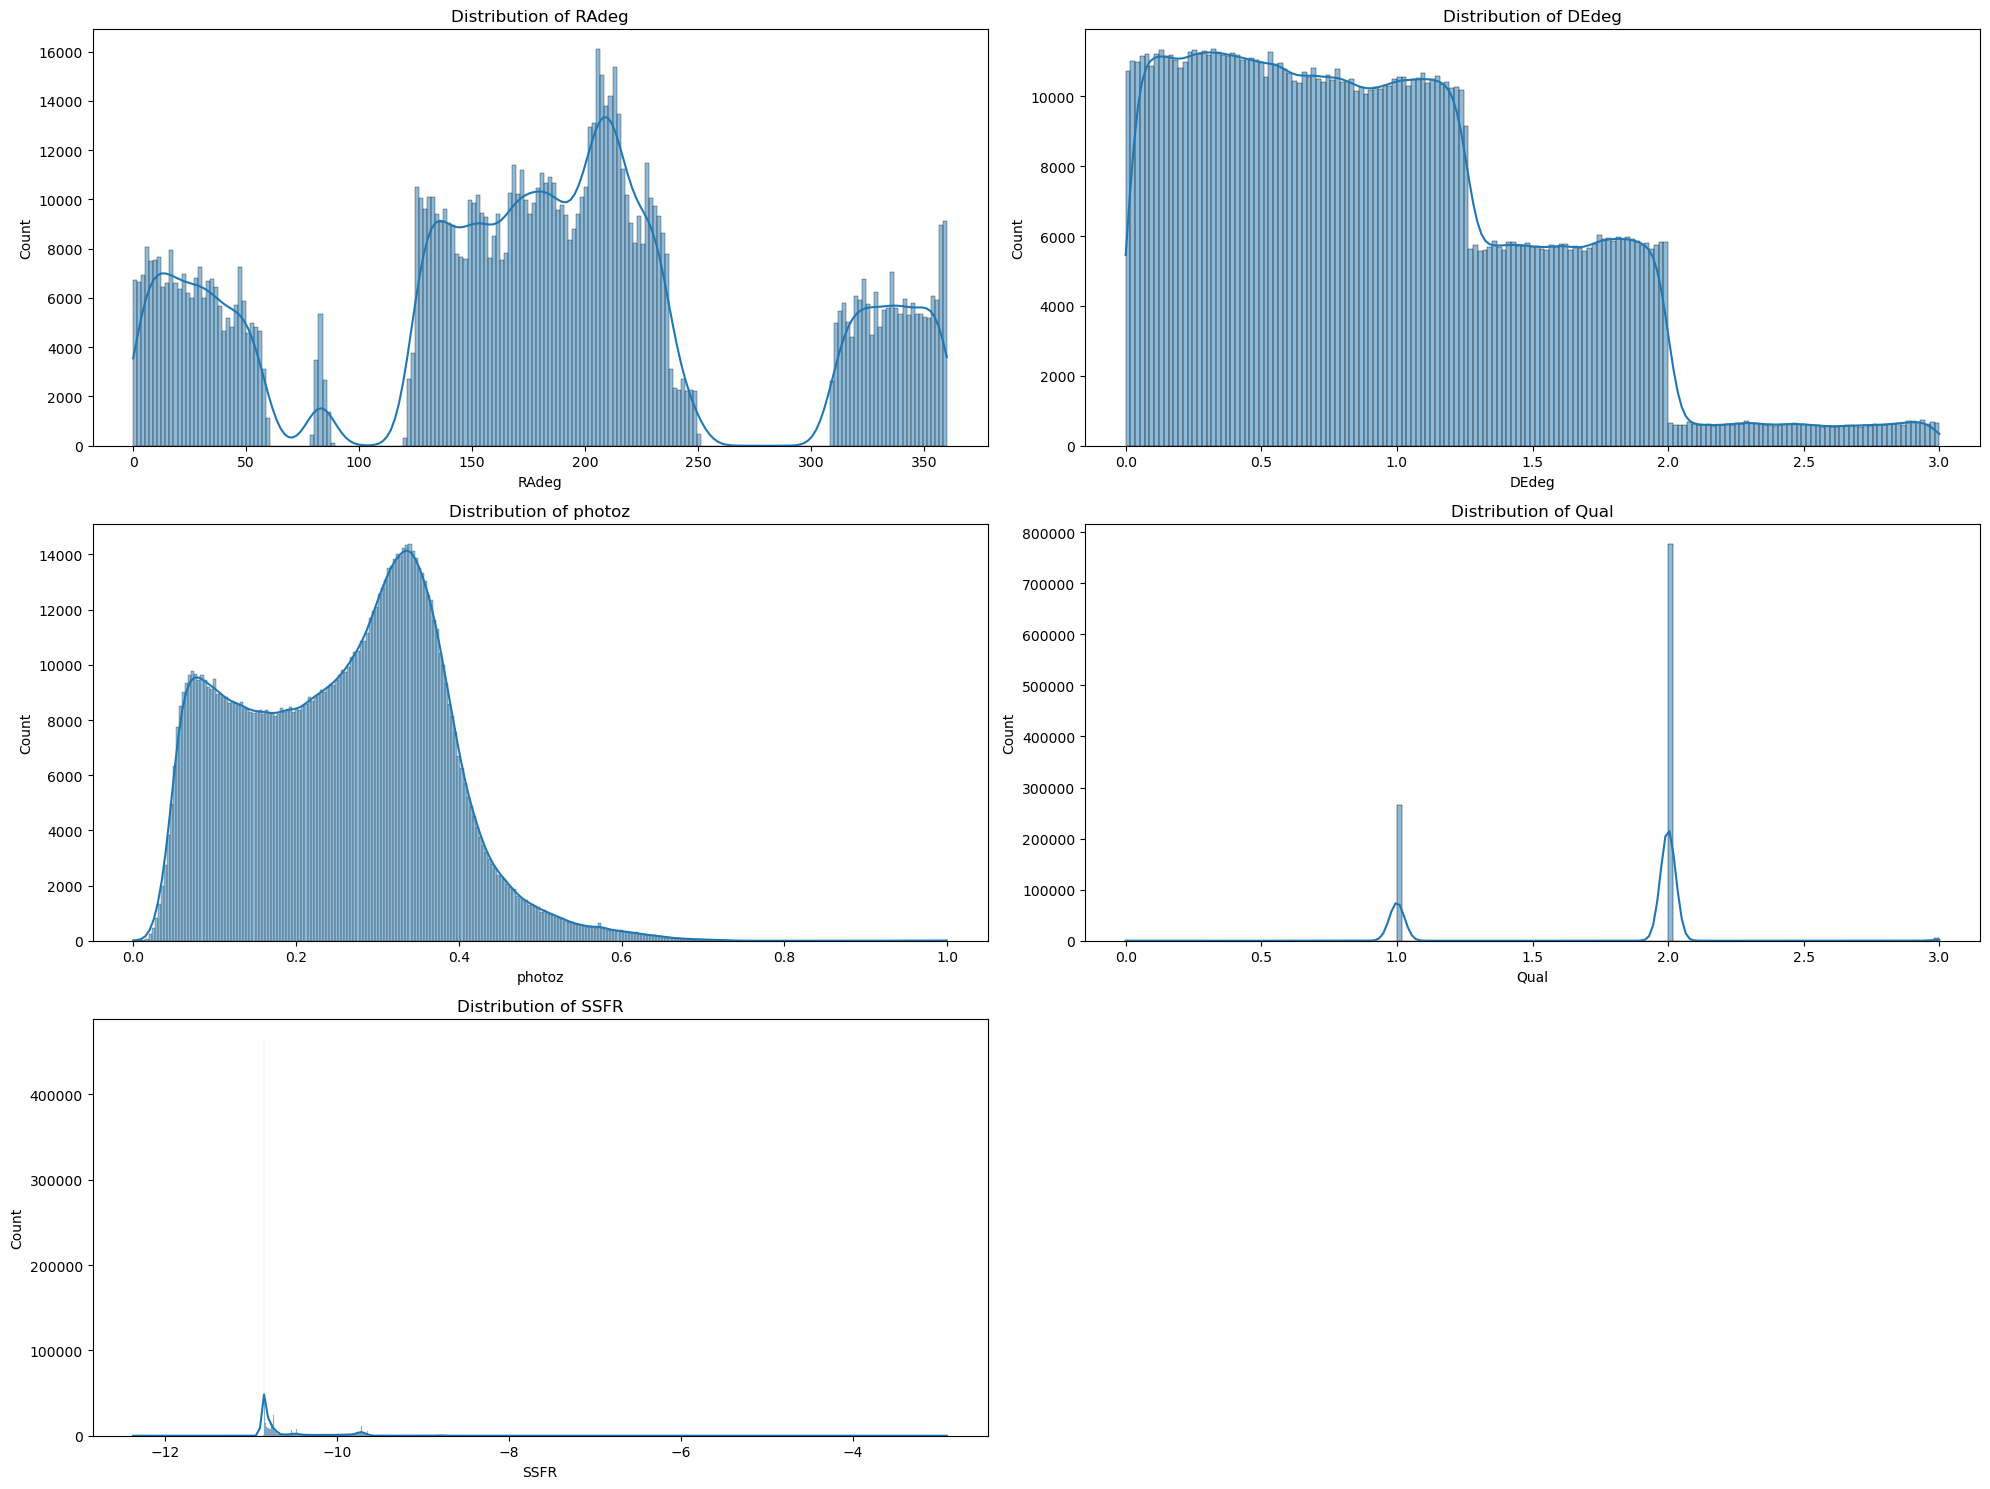

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Load the data
file_path = r"C:\Users\Satvik\Downloads\photometric_sfr.csv"
df = pd.read_csv(file_path, header=None)
df.columns = ['dr9objID', 'objID', 'RAdeg', 'DEdeg', 'photoz', 'Qual', 'SSFR']

print("Data shape:", df.shape)
print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

print("\nSummary statistics:")
print(df.describe())

# Distribution plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[2:], 1):  # Exclude ID columns
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig(r"D:\output\distribution_plots.png")  # Save distribution plots
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, 2:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig(r"D:\output\correlation_heatmap.png")  # Save heatmap
plt.show()

# Scatter plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[2:-1], 1):  # Exclude ID columns and target
    plt.subplot(2, 2, i)
    plt.scatter(df[col], df['SSFR'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('SSFR')
    plt.title(f'{col} vs SSFR')
plt.tight_layout()
plt.savefig(r"D:\output\scatter_plots.png")  # Save scatter plots
plt.show()

# Check for outliers
def plot_boxplot(df, col):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.savefig(rf"D:\output\boxplot_{col}.png")  # Save boxplot
    plt.show()

for col in df.columns[2:]:  # Exclude ID columns
    plot_boxplot(df, col)

# Function to calculate skewness
def calculate_skewness(df):
    skewness = df.skew()
    print("Skewness:")
    print(skewness)
    return skewness

skewness = calculate_skewness(df.iloc[:, 2:])  # Exclude ID columns

# Function to handle outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Handle outliers for numerical columns
for col in df.columns[2:]:  # Exclude ID columns
    df = handle_outliers(df, col)

print("\nAfter handling outliers:")
print(df.describe())

# Check skewness after handling outliers
skewness_after = calculate_skewness(df.iloc[:, 2:])  # Exclude ID columns

# Apply Power Transform to handle skewness
pt = PowerTransformer(method='yeo-johnson', standardize=True)
df_transformed = pd.DataFrame(pt.fit_transform(df.iloc[:, 2:]), columns=df.columns[2:])

print("\nAfter Power Transform:")
print(df_transformed.describe())

# Check skewness after Power Transform
skewness_pt = calculate_skewness(df_transformed)

# Impute missing values if any
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_transformed), columns=df_transformed.columns)

print("\nAfter imputation:")
print(df_imputed.isnull().sum())

# Feature importance using mutual information
X = df_imputed.drop('SSFR', axis=1)
y = df_imputed['SSFR']

mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
mi_scores.plot.bar()
plt.title('Feature Importance based on Mutual Information')
plt.tight_layout()
plt.savefig(r"D:\output\feature_importance.png")  # Save feature importance plot
plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Save preprocessed data
df_preprocessed = pd.concat([X, y], axis=1)
df_preprocessed.to_csv(r"D:\output\preprocessed_data.csv", index=False)
print("\nPreprocessed data saved to 'D:\\output\\preprocessed_data.csv'")

# Synthetic data generation
def generate_synthetic_data(df, num_samples):
    synthetic_data = pd.DataFrame()
    pt = PowerTransformer(method='yeo-johnson', standardize=True)
    numerical_columns = ['RAdeg', 'DEdeg', 'photoz', 'SSFR']

    # Fit the PowerTransformer to the original data
    transformed_data = pt.fit_transform(df[numerical_columns])

    # Generate synthetic data
    synthetic_transformed = np.random.normal(0, 1, (num_samples, len(numerical_columns)))
    synthetic_numerical = pt.inverse_transform(synthetic_transformed)

    # Add synthetic numerical data to DataFrame
    for i, column in enumerate(numerical_columns):
        synthetic_data[column] = synthetic_numerical[:, i]

    # Handle categorical variables
    synthetic_data['Qual'] = np.random.choice(df['Qual'].unique(), size=num_samples)
    synthetic_data['dr9objID'] = np.random.randint(1e12, 1e13, num_samples)
    synthetic_data['objID'] = np.random.randint(5e11, 6e11, num_samples)

    return synthetic_data

print("Generating synthetic data...")
synthetic_data = generate_synthetic_data(df, len(df))

# Combine original data and synthetic data
combined_data = pd.concat([df, synthetic_data], ignore_index=True)

# Save synthetic and combined data
synthetic_data.to_csv(r"D:\output\synthetic_data.csv", index=False)
combined_data.to_csv(r"D:\output\combined_data.csv", index=False)
print("Synthetic and combined data saved.")

# Model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'R2 Score': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'Cross-val Score': np.mean(cross_val_score(model, X_test, y_test, cv=5))
    }

# Train models
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Hyperparameter tuning
    gb_param_dist = {
        'n_estimators': [100, 200, 300, 400],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5, 6],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.8, 0.9, 1.0]
    }

    rf_param_dist = {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }

    gb = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions=gb_param_dist, n_iter=20, cv=5, random_state=42, n_jobs=-1)
    rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=rf_param_dist, n_iter=20, cv=5, random_state=42, n_jobs=-1)

    print("Training Gradient Boosting Regressor...")
    gb.fit(X_train, y_train)
    print("Training Random Forest Regressor...")
    rf.fit(X_train, y_train)

    gb_evaluation = evaluate_model(gb.best_estimator_, X_test, y_test)
    rf_evaluation = evaluate_model(rf.best_estimator_, X_test, y_test)

    return gb_evaluation, rf_evaluation

# Perform model training and evaluation
gb_eval, rf_eval = train_and_evaluate_models(X_train, X_test, y_train, y_test)

# Save evaluation metrics
evaluation_df = pd.DataFrame([gb_eval, rf_eval], index=['Gradient Boosting', 'Random Forest'])
evaluation_df.to_csv(r"D:\output\evaluation_metrics.csv")
print("Evaluation metrics saved to 'D:\\output\\evaluation_metrics.csv'")


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv(r"C:\Users\Satvik\Downloads\photometric_sfr.csv", header=None)
df.columns = ['dr9objID', 'objID', 'RAdeg', 'DEdeg', 'photoz', 'Qual', 'SSFR']

# Feature engineering
df['celestial_position'] = np.sqrt(df['RAdeg']**2 + df['DEdeg']**2)

# Prepare features and target
X = df[['RAdeg', 'DEdeg', 'photoz', 'Qual', 'celestial_position']]
y = df['SSFR']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipeline
numeric_features = ['RAdeg', 'DEdeg', 'photoz', 'celestial_position']
categorical_features = ['Qual']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Fit the preprocessor and transform the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Get feature names after preprocessing
feature_names = (numeric_features + 
                 [f'Qual_{i}' for i in range(1, len(preprocessor.named_transformers_['cat'].categories_[0]))])

# Convert to DataFrames
X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=feature_names)

print("Preprocessed training data shape:", X_train_preprocessed.shape)
print("Preprocessed test data shape:", X_test_preprocessed.shape)
print("\nPreprocessed features:")
print(X_train_preprocessed.head())

# Save preprocessed data
X_train_preprocessed.to_csv(r"D:\output aud\X_train_preprocessed.csv", index=False)
X_test_preprocessed.to_csv(r"D:\output aud\X_test_preprocessed.csv", index=False)
y_train.to_csv(r"D:\output aud\y_train.csv", index=False)
y_test.to_csv(r"D:\output aud\y_test.csv", index=False)

print("\nPreprocessed data saved to CSV files in the D:\\output aud directory.")


Preprocessed training data shape: (838860, 7)
Preprocessed test data shape: (209716, 7)

Preprocessed features:
      RAdeg     DEdeg    photoz  celestial_position  Qual_1  Qual_2  Qual_3
0  0.400434  0.152326  0.135931            0.400403     0.0     1.0     0.0
1  0.093649  0.390724  0.128681            0.093657     1.0     0.0     0.0
2  0.028841  0.046800  0.341702            0.028791     0.0     1.0     0.0
3  0.690451  0.043849  0.262634            0.690434     1.0     0.0     0.0
4  0.130626  0.332429  0.348182            0.130608     0.0     1.0     0.0

Preprocessed data saved to CSV files in the D:\output aud directory.


This code implements multiple regression models to predict the Specific Star Formation Rate (SSFR) using preprocessed training and testing datasets. It begins by loading the training and testing data from CSV files. Several regression models are defined, including Linear Regression, Ridge Regression, Lasso Regression, Random Forest, and Gradient Boosting, with some hyperparameters optimized for better performance. The code evaluates each model using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² score. Cross-validation is performed to assess model stability, and training times for each model are recorded. Finally, the results are printed and saved to a CSV file for further analysis.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from tqdm import tqdm
import time

# Load the preprocessed data
X_train = pd.read_csv(r"D:\output aud\X_train_preprocessed.csv")
X_test = pd.read_csv(r"D:\output aud\X_test_preprocessed.csv")
y_train = pd.read_csv(r"D:\output aud\y_train.csv").values.ravel()
y_test = pd.read_csv(r"D:\output aud\y_test.csv").values.ravel()

# Define models with some hyperparameters tuned for better performance
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, random_state=42)
}

def evaluate_model(y_true, y_pred):
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

results = {}

for name, model in tqdm(models.items(), desc="Training Models", unit="model"):
    start_time = time.time()
    
    print(f"Training {name}...")
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate model
    eval_results = evaluate_model(y_test, y_pred)
    
    # Perform cross-validation
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    
    # Calculate training time
    train_time = time.time() - start_time
    
    results[name] = {**eval_results, "CV R2": np.mean(cv_scores), "Training Time": train_time}

# Print results
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

# Save results to CSV
results_df = pd.DataFrame(results).T
results_df.to_csv(r"D:\output aud\model_results.csv")
print("\nResults saved to 'D:\output aud\model_results.csv'")


<>:67: SyntaxWarning: invalid escape sequence '\o'
<>:67: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Satvik\AppData\Local\Temp\ipykernel_38376\3861683045.py:67: SyntaxWarning: invalid escape sequence '\o'
  print("\nResults saved to 'D:\output aud\model_results.csv'")
Training Models:   0%|          | 0/5 [00:00<?, ?model/s]

Training Linear Regression...


Training Models:  20%|██        | 1/5 [00:01<00:06,  1.55s/model]

Training Ridge Regression...


Training Models:  40%|████      | 2/5 [00:02<00:03,  1.10s/model]

Training Lasso Regression...


Training Models:  60%|██████    | 3/5 [00:03<00:02,  1.06s/model]

Training Random Forest...


Training Models:  80%|████████  | 4/5 [06:58<02:44, 164.59s/model]

Training Gradient Boosting...


Training Models: 100%|██████████| 5/5 [19:02<00:00, 228.50s/model]


Linear Regression:
  MSE: 0.1921
  RMSE: 0.4383
  MAE: 0.3145
  R2: 0.0255
  CV R2: 0.0264
  Training Time: 1.5514

Ridge Regression:
  MSE: 0.1921
  RMSE: 0.4383
  MAE: 0.3145
  R2: 0.0255
  CV R2: 0.0264
  Training Time: 0.7808

Lasso Regression:
  MSE: 0.1971
  RMSE: 0.4440
  MAE: 0.3239
  R2: -0.0000
  CV R2: -0.0000
  Training Time: 1.0140

Random Forest:
  MSE: 0.1890
  RMSE: 0.4347
  MAE: 0.3095
  R2: 0.0415
  CV R2: 0.0417
  Training Time: 415.2720

Gradient Boosting:
  MSE: 0.1891
  RMSE: 0.4349
  MAE: 0.3106
  R2: 0.0405
  CV R2: 0.0416
  Training Time: 723.8570

Results saved to 'D:\output aud\model_results.csv'


This code generates synthetic data based on an existing dataset to augment training for predictive modeling. It begins by loading preprocessed training features and target variables from CSV files, then combines them into a single DataFrame. The generate_synthetic_data function normalizes the data using MinMaxScaler, computes the correlation matrix, and samples from a multivariate normal distribution. These samples are transformed back to the original scale, creating a synthetic dataset with the same number of samples as the original. The synthetic data is saved to a CSV file, and basic statistics and correlation comparisons are printed for both the original and synthetic datasets to evaluate their similarities.

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

def generate_synthetic_data(data, num_samples):
    # Create a copy of the data
    df = data.copy()
    
    # Initialize MinMaxScaler
    scaler = MinMaxScaler()
    
    # Fit and transform the data
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    
    # Calculate the correlation matrix
    corr_matrix = df_scaled.corr()
    
    # Generate samples from a multivariate normal distribution
    mvn_samples = np.random.multivariate_normal(np.zeros(len(df_scaled.columns)), 
                                                corr_matrix, 
                                                size=num_samples)
    
    # Convert the samples to uniform using the CDF of the standard normal distribution
    uniform_samples = stats.norm.cdf(mvn_samples)
    
    # Convert uniform samples back to the original scale
    synthetic_data = scaler.inverse_transform(uniform_samples)
    
    # Convert to DataFrame
    synthetic_df = pd.DataFrame(synthetic_data, columns=df.columns)
    
    return synthetic_df

# Load the preprocessed data
X_train = pd.read_csv(r"D:\output aud\X_train_preprocessed.csv")
y_train = pd.read_csv(r"D:\output aud\y_train.csv")

# Combine features and target
full_data = pd.concat([X_train, y_train], axis=1)

# Generate synthetic data
num_synthetic_samples = len(full_data)  # Generate the same number of samples as the original data
synthetic_data = generate_synthetic_data(full_data, num_synthetic_samples)

# Save the synthetic data
synthetic_data.to_csv(r"D:\output aud\synthetic_data.csv", index=False)

print("Synthetic data generated and saved to 'D:\output aud\synthetic_data.csv'")

# Compare basic statistics
print("\nOriginal Data Statistics:")
print(full_data.describe())

print("\nSynthetic Data Statistics:")
print(synthetic_data.describe())

# Compare correlations
print("\nOriginal Data Correlations:")
print(full_data.corr())

print("\nSynthetic Data Correlations:")
print(synthetic_data.corr())

<>:49: SyntaxWarning: invalid escape sequence '\o'
<>:49: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Satvik\AppData\Local\Temp\ipykernel_38376\2367529001.py:49: SyntaxWarning: invalid escape sequence '\o'
  print("Synthetic data generated and saved to 'D:\output aud\synthetic_data.csv'")


Synthetic data generated and saved to 'D:\output aud\synthetic_data.csv'

Original Data Statistics:
               RAdeg          DEdeg         photoz  celestial_position  \
count  838860.000000  838860.000000  838860.000000       838860.000000   
mean        0.487616       0.305389       0.255481            0.487611   
std         0.268370       0.204893       0.120959            0.268361   
min         0.000000       0.000000       0.000000            0.000000   
25%         0.363873       0.137586       0.153636            0.363855   
50%         0.502198       0.280409       0.266039            0.502181   
75%         0.616130       0.436113       0.344672            0.616117   
max         1.000000       1.000000       1.000000            1.000000   

              Qual_1         Qual_2         Qual_3           SSFR  
count  838860.000000  838860.000000  838860.000000  838860.000000  
mean        0.253773       0.740064       0.005947     -10.601618  
std         0.435169       0.




This code generates improved synthetic data based on an existing dataset, enhancing its utility for modeling. It begins by loading preprocessed training features and target variables from CSV files and combining them into a single DataFrame. The generate_synthetic_data function separates continuous and categorical variables, applying a QuantileTransformer to the continuous features to ensure they follow a normal distribution. Samples are then drawn from a multivariate normal distribution based on the correlation of the transformed data, and categorical variables are generated based on their original distribution. The synthetic dataset is saved to a CSV file. Basic statistics and correlations are compared between the original and synthetic datasets, followed by visual comparisons using histograms, Q-Q plots for continuous variables, and bar plots for categorical variables to assess similarity in distributions.

<>:53: SyntaxWarning: invalid escape sequence '\o'
<>:53: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Satvik\AppData\Local\Temp\ipykernel_38376\1055764141.py:53: SyntaxWarning: invalid escape sequence '\o'
  print("Improved synthetic data generated and saved to 'D:\output aud\improved_synthetic_data.csv'")
C:\Users\Satvik\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Improved synthetic data generated and saved to 'D:\output aud\improved_synthetic_data.csv'

Original Data Statistics:
               RAdeg          DEdeg         photoz  celestial_position  \
count  838860.000000  838860.000000  838860.000000       838860.000000   
mean        0.487616       0.305389       0.255481            0.487611   
std         0.268370       0.204893       0.120959            0.268361   
min         0.000000       0.000000       0.000000            0.000000   
25%         0.363873       0.137586       0.153636            0.363855   
50%         0.502198       0.280409       0.266039            0.502181   
75%         0.616130       0.436113       0.344672            0.616117   
max         1.000000       1.000000       1.000000            1.000000   

              Qual_1         Qual_2         Qual_3           SSFR  
count  838860.000000  838860.000000  838860.000000  838860.000000  
mean        0.253773       0.740064       0.005947     -10.601618  
std        

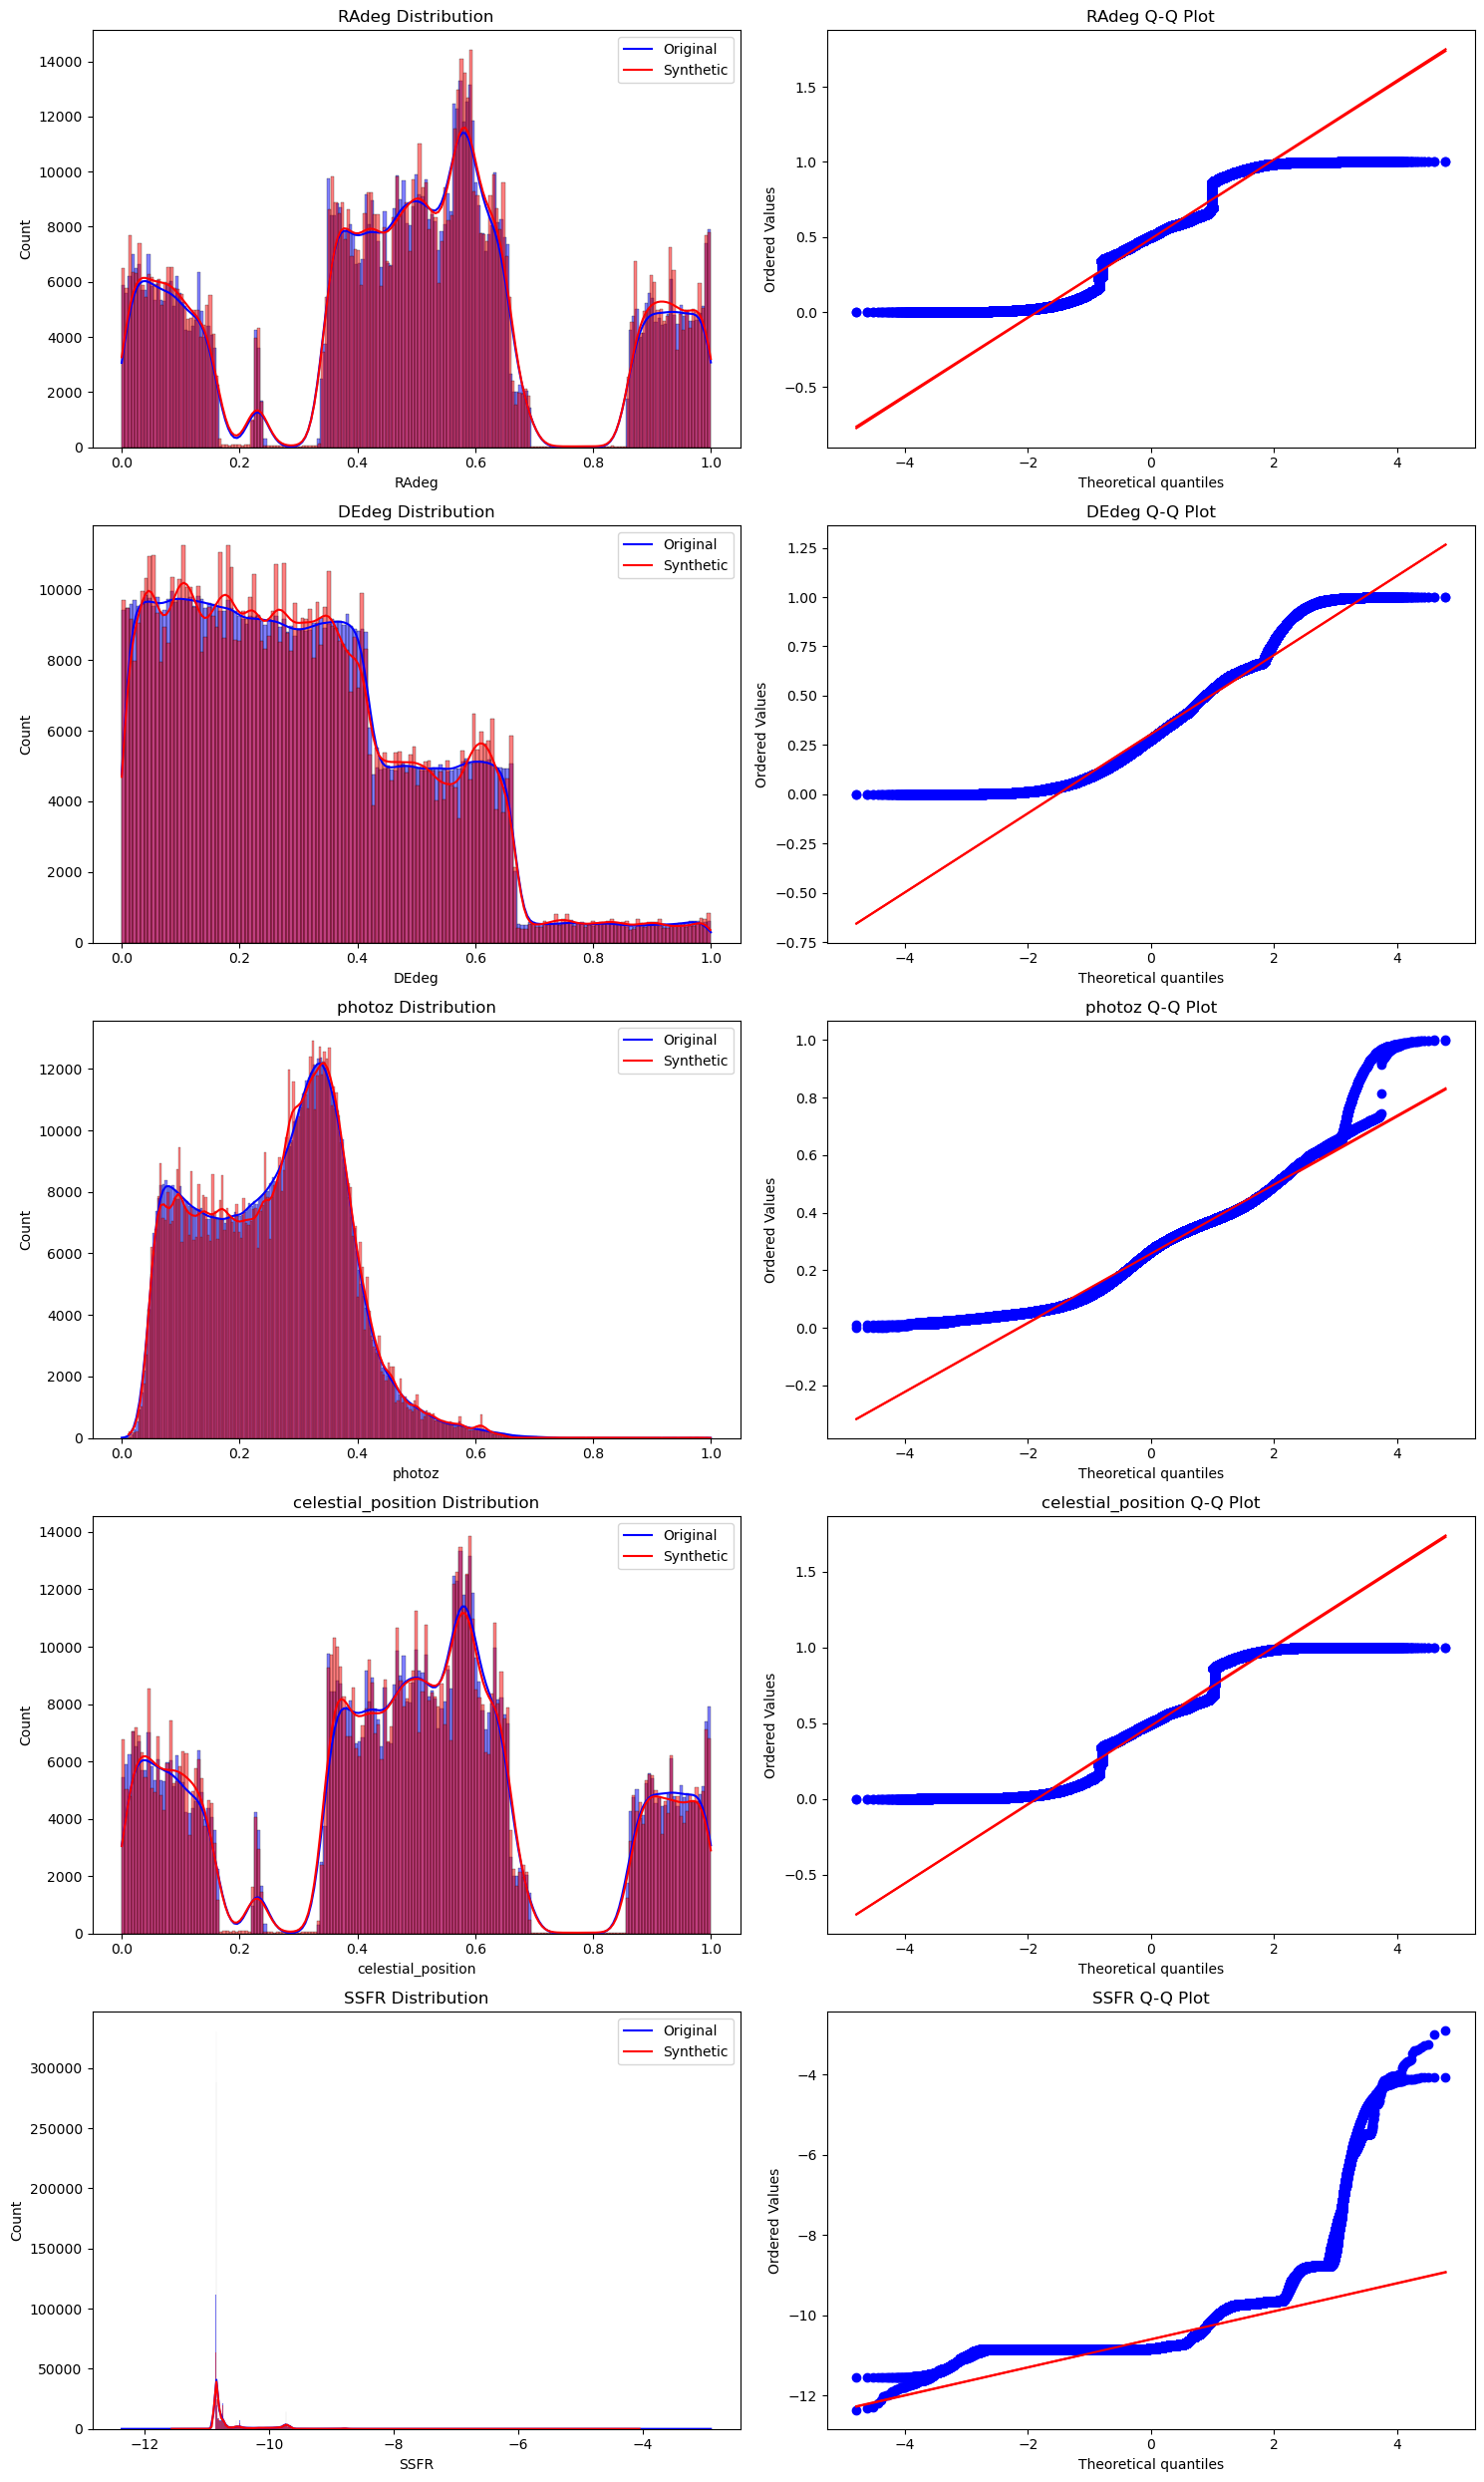

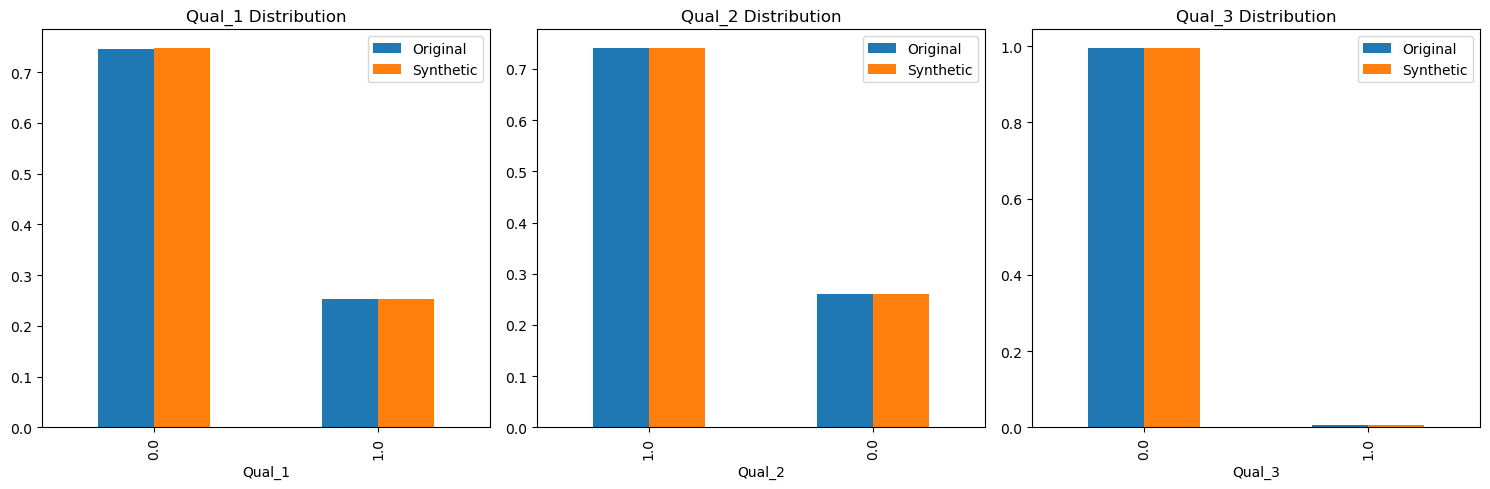

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import QuantileTransformer

def generate_synthetic_data(data, num_samples):
    # Separate continuous and categorical variables
    continuous_cols = ['RAdeg', 'DEdeg', 'photoz', 'celestial_position', 'SSFR']
    categorical_cols = ['Qual_1', 'Qual_2', 'Qual_3']
    
    # Initialize QuantileTransformer
    qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal')
    
    # Fit and transform continuous data
    continuous_data = data[continuous_cols]
    transformed_data = qt.fit_transform(continuous_data)
    
    # Calculate the correlation matrix of the transformed data
    corr_matrix = np.corrcoef(transformed_data.T)
    
    # Generate samples from a multivariate normal distribution
    mvn_samples = np.random.multivariate_normal(np.zeros(len(continuous_cols)), 
                                                corr_matrix, 
                                                size=num_samples)
    
    # Inverse transform the samples
    synthetic_continuous = qt.inverse_transform(mvn_samples)
    
    # Create DataFrame with synthetic continuous data
    synthetic_df = pd.DataFrame(synthetic_continuous, columns=continuous_cols)
    
    # Generate synthetic categorical data
    for col in categorical_cols:
        probs = data[col].value_counts(normalize=True)
        synthetic_df[col] = np.random.choice(probs.index, size=num_samples, p=probs.values)
    
    return synthetic_df

# Load the preprocessed data
X_train = pd.read_csv(r"D:\output aud\X_train_preprocessed.csv")
y_train = pd.read_csv(r"D:\output aud\y_train.csv")

# Combine features and target
full_data = pd.concat([X_train, y_train], axis=1)

# Generate synthetic data
num_synthetic_samples = len(full_data)
synthetic_data = generate_synthetic_data(full_data, num_synthetic_samples)

# Save the synthetic data
synthetic_data.to_csv(r"D:\output aud\improved_synthetic_data.csv", index=False)

print("Improved synthetic data generated and saved to 'D:\output aud\improved_synthetic_data.csv'")

# Compare basic statistics
print("\nOriginal Data Statistics:")
print(full_data.describe())

print("\nImproved Synthetic Data Statistics:")
print(synthetic_data.describe())

# Compare correlations
print("\nOriginal Data Correlations:")
print(full_data.corr())

print("\nImproved Synthetic Data Correlations:")
print(synthetic_data.corr())

# Visual comparison
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(original, synthetic, columns):
    n_cols = len(columns)
    fig, axes = plt.subplots(n_cols, 2, figsize=(15, 5*n_cols))
    
    for i, col in enumerate(columns):
        # Histogram
        sns.histplot(data=original, x=col, kde=True, color='blue', alpha=0.5, ax=axes[i, 0])
        sns.histplot(data=synthetic, x=col, kde=True, color='red', alpha=0.5, ax=axes[i, 0])
        axes[i, 0].set_title(f'{col} Distribution')
        axes[i, 0].legend(['Original', 'Synthetic'])
        
        # Q-Q plot
        stats.probplot(original[col], dist="norm", plot=axes[i, 1])
        stats.probplot(synthetic[col], dist="norm", plot=axes[i, 1])
        axes[i, 1].set_title(f'{col} Q-Q Plot')
    
    plt.tight_layout()
    plt.show()

# Plot distributions for continuous variables
continuous_cols = ['RAdeg', 'DEdeg', 'photoz', 'celestial_position', 'SSFR']
plot_distributions(full_data, synthetic_data, continuous_cols)

# Plot categorical variable distributions
categorical_cols = ['Qual_1', 'Qual_2', 'Qual_3']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(categorical_cols):
    original_counts = full_data[col].value_counts(normalize=True)
    synthetic_counts = synthetic_data[col].value_counts(normalize=True)
    
    df_counts = pd.DataFrame({'Original': original_counts, 'Synthetic': synthetic_counts}).fillna(0)
    df_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].legend(['Original', 'Synthetic'])

plt.tight_layout()
plt.show()

This code evaluates the quality and performance of improved synthetic data generated from an original dataset. It begins by loading both datasets and comparing descriptive statistics to assess basic differences. The Kolmogorov-Smirnov (K-S) test is employed to quantify how closely the distributions of specific features match between the original and synthetic datasets. Correlation matrices are computed and visualized to examine the relationships between features in both datasets. Principal Component Analysis (PCA) is utilized to visualize the overall structure and distribution of both datasets in a reduced dimensional space. Lastly, the code assesses model performance by training a Random Forest regressor on the original data and testing it on the synthetic data, and vice versa, reporting metrics such as Mean Squared Error (MSE) and R² scores to evaluate the predictive capabilities of the models.

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

# Load the original and synthetic data
original_data = pd.read_csv(r"C:\Users\Satvik\Downloads\photometric_sfr.csv")
synthetic_data = pd.read_csv(r"D:\output aud\improved_synthetic_data.csv")

# 1. Descriptive Statistics Comparison
def descriptive_stats_comparison(original, synthetic):
    original_stats = original.describe()
    synthetic_stats = synthetic.describe()
    return original_stats, synthetic_stats

original_stats, synthetic_stats = descriptive_stats_comparison(original_data, synthetic_data)
print("Original Data Statistics:\n", original_stats)
print("\nSynthetic Data Statistics:\n", synthetic_stats)

# 2. Kolmogorov-Smirnov (K-S) Test for each feature
def ks_test(original, synthetic, columns):
    ks_results = {}
    for col in columns:
        stat, p_value = stats.ks_2samp(original[col], synthetic[col])
        ks_results[col] = {'KS Statistic': stat, 'P-Value': p_value}
    return ks_results

columns = ['RAdeg', 'DEdeg', 'photoz', 'SSFR']  # Change columns based on your dataset
ks_results = ks_test(original_data, synthetic_data, columns)
print("\nK-S Test Results:\n", ks_results)

# 3. Correlation Matrix Comparison
def correlation_comparison(original, synthetic, columns):
    original_corr = original[columns].corr()
    synthetic_corr = synthetic[columns].corr()
    return original_corr, synthetic_corr

original_corr, synthetic_corr = correlation_comparison(original_data, synthetic_data, columns)

# Plot the correlation matrices for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(original_corr, annot=True, cmap='coolwarm')
plt.title('Original Data Correlation Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(synthetic_corr, annot=True, cmap='coolwarm')
plt.title('Synthetic Data Correlation Matrix')

plt.savefig(r"D:\output aud\correlation_comparison.png", dpi=300, bbox_inches='tight')
plt.close()

# 4. PCA Visualization
def pca_visualization(original, synthetic, columns):
    pca = PCA(n_components=2)
    original_pca = pca.fit_transform(original[columns])
    synthetic_pca = pca.transform(synthetic[columns])

    plt.figure(figsize=(10, 6))
    plt.scatter(original_pca[:, 0], original_pca[:, 1], c='blue', label='Original Data', alpha=0.5)
    plt.scatter(synthetic_pca[:, 0], synthetic_pca[:, 1], c='green', label='Synthetic Data', alpha=0.5)
    plt.legend()
    plt.title('PCA Comparison of Original and Synthetic Data')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.savefig(r"D:\output aud\pca_comparison.png", dpi=300, bbox_inches='tight')
    plt.close()

pca_visualization(original_data, synthetic_data, columns)

# 5. Train/Test Swap Performance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def train_test_performance(original, synthetic, target_column):
    # Split original data
    X_orig = original.drop(columns=[target_column])
    y_orig = original[target_column]
    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y_orig, test_size=0.3, random_state=42)

    # Split synthetic data
    X_syn = synthetic.drop(columns=[target_column])
    y_syn = synthetic[target_column]
    X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(X_syn, y_syn, test_size=0.3, random_state=42)

    # Train on original, test on synthetic
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_orig, y_train_orig)
    y_pred_syn = model.predict(X_test_syn)
    
    mse_orig_syn = mean_squared_error(y_test_syn, y_pred_syn)
    r2_orig_syn = r2_score(y_test_syn, y_pred_syn)

    # Train on synthetic, test on original
    model.fit(X_train_syn, y_train_syn)
    y_pred_orig = model.predict(X_test_orig)
    
    mse_syn_orig = mean_squared_error(y_test_orig, y_pred_orig)
    r2_syn_orig = r2_score(y_test_orig, y_pred_orig)

    return mse_orig_syn, r2_orig_syn, mse_syn_orig, r2_syn_orig

mse_orig_syn, r2_orig_syn, mse_syn_orig, r2_syn_orig = train_test_performance(original_data, synthetic_data, 'SSFR')
print("\nPerformance when trained on original and tested on synthetic:")
print(f"MSE: {mse_orig_syn}, R2: {r2_orig_syn}")

print("\nPerformance when trained on synthetic and tested on original:")
print(f"MSE: {mse_syn_orig}, R2: {r2_syn_orig}")


Original Data Statistics:
        1.23764867453466E+018  5.8772295330975E+017    249.668602  \
count           1.048575e+06          1.048575e+06  1.048575e+06   
mean            1.237659e+18          5.901346e+17  1.755969e+02   
std             9.624570e+12          1.931500e+16  9.662315e+01   
min             1.237646e+18          5.877230e+17  5.810000e-04   
25%             1.237651e+18          5.877260e+17  1.310097e+02   
50%             1.237655e+18          5.877312e+17  1.808496e+02   
75%             1.237664e+18          5.880155e+17  2.218450e+02   
max             1.237680e+18          7.588874e+17  3.600000e+02   

           0.398584      0.350622             2      -10.8484  
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  
mean   9.164918e-01  2.554680e-01  1.752270e+00 -1.060158e+01  
std    6.147396e-01  1.209255e-01  4.457587e-01  4.425988e-01  
min   -1.130000e-04  9.400000e-05  0.000000e+00 -1.237190e+01  
25%    4.129380e-01  1.536835e-01  1.000

KeyError: 'RAdeg'

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

# Load the original and synthetic data
original_data = pd.read_csv(r"C:\Users\Satvik\Downloads\photometric_sfr.csv")
synthetic_data = pd.read_csv(r"D:\output aud\improved_synthetic_data.csv")

# 1. Descriptive Statistics Comparison
def descriptive_stats_comparison(original, synthetic):
    original_stats = original.describe()
    synthetic_stats = synthetic.describe()
    return original_stats, synthetic_stats

original_stats, synthetic_stats = descriptive_stats_comparison(original_data, synthetic_data)
print("Descriptive Statistics Comparison:")
print("Original Data Statistics:\n", original_stats)
print("\nSynthetic Data Statistics:\n", synthetic_stats)

# 2. Kolmogorov-Smirnov (K-S) Test for each feature
def ks_test(original, synthetic, columns):
    ks_results = {}
    for col in columns:
        stat, p_value = stats.ks_2samp(original[col], synthetic[col])
        ks_results[col] = {'KS Statistic': stat, 'P-Value': p_value}
    return ks_results

columns = ['RAdeg', 'DEdeg', 'photoz', 'SSFR']  # Adjust based on your dataset
ks_results = ks_test(original_data, synthetic_data, columns)
print("\nKolmogorov-Smirnov (K-S) Test Results:")
for col, result in ks_results.items():
    print(f"{col}: KS Statistic = {result['KS Statistic']:.4f}, P-Value = {result['P-Value']:.4e}")

# 3. Correlation Matrix Difference (Frobenius norm)
def correlation_difference(original, synthetic, columns):
    original_corr = original[columns].corr()
    synthetic_corr = synthetic[columns].corr()
    frobenius_norm = np.linalg.norm(original_corr.values - synthetic_corr.values)
    return frobenius_norm

corr_diff = correlation_difference(original_data, synthetic_data, columns)
print(f"\nCorrelation Matrix Difference (Frobenius norm): {corr_diff:.4f}")

# 4. Train/Test Swap Performance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def train_test_performance(original, synthetic, target_column):
    # Split original data
    X_orig = original.drop(columns=[target_column])
    y_orig = original[target_column]
    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y_orig, test_size=0.3, random_state=42)

    # Split synthetic data
    X_syn = synthetic.drop(columns=[target_column])
    y_syn = synthetic[target_column]
    X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(X_syn, y_syn, test_size=0.3, random_state=42)

    # Train on original, test on synthetic
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_orig, y_train_orig)
    y_pred_syn = model.predict(X_test_syn)
    
    mse_orig_syn = mean_squared_error(y_test_syn, y_pred_syn)
    r2_orig_syn = r2_score(y_test_syn, y_pred_syn)

    # Train on synthetic, test on original
    model.fit(X_train_syn, y_train_syn)
    y_pred_orig = model.predict(X_test_orig)
    
    mse_syn_orig = mean_squared_error(y_test_orig, y_pred_orig)
    r2_syn_orig = r2_score(y_test_orig, y_pred_orig)

    return mse_orig_syn, r2_orig_syn, mse_syn_orig, r2_syn_orig

mse_orig_syn, r2_orig_syn, mse_syn_orig, r2_syn_orig = train_test_performance(original_data, synthetic_data, 'SSFR')
print("\nPerformance Metrics (Train/Test Swap):")
print(f"Trained on original, tested on synthetic -> MSE: {mse_orig_syn:.4f}, R2: {r2_orig_syn:.4f}")
print(f"Trained on synthetic, tested on original -> MSE: {mse_syn_orig:.4f}, R2: {r2_syn_orig:.4f}")


Descriptive Statistics Comparison:
Original Data Statistics:
        1.23764867453466E+018  5.8772295330975E+017    249.668602  \
count           1.048575e+06          1.048575e+06  1.048575e+06   
mean            1.237659e+18          5.901346e+17  1.755969e+02   
std             9.624570e+12          1.931500e+16  9.662315e+01   
min             1.237646e+18          5.877230e+17  5.810000e-04   
25%             1.237651e+18          5.877260e+17  1.310097e+02   
50%             1.237655e+18          5.877312e+17  1.808496e+02   
75%             1.237664e+18          5.880155e+17  2.218450e+02   
max             1.237680e+18          7.588874e+17  3.600000e+02   

           0.398584      0.350622             2      -10.8484  
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  
mean   9.164918e-01  2.554680e-01  1.752270e+00 -1.060158e+01  
std    6.147396e-01  1.209255e-01  4.457587e-01  4.425988e-01  
min   -1.130000e-04  9.400000e-05  0.000000e+00 -1.237190e+01  
25%  

KeyError: 'RAdeg'

## Advanced SSFR Prediction

This code trains and evaluates predictive models for estimating the Specific Star Formation Rate (SSFR) using synthetic data. It begins by loading the synthetic dataset and preparing the feature matrix and target variable. The data is then split into training and testing sets. Two pipelines are defined for Random Forest and Gradient Boosting regressors, each incorporating feature scaling through StandardScaler. Randomized search is performed to optimize hyperparameters for both models, comparing their performance. The best-performing model is selected based on cross-validated scores. Predictions are made on the test set, and model performance is evaluated using Mean Squared Error (MSE) and R² score. A bar plot is generated to visualize feature importances, which is saved as an image file. Finally, the best model is saved for future use using the joblib library.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform

# Load the synthetic data
synthetic_data = pd.read_csv(r"D:\output aud\improved_synthetic_data.csv")

# Prepare features and target
X = synthetic_data[['RAdeg', 'DEdeg', 'photoz', 'celestial_position', 'Qual_1', 'Qual_2', 'Qual_3']]
y = synthetic_data['SSFR']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipelines for different models
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingRegressor(random_state=42))
])

# Define parameter distributions for random search
rf_param_dist = {
    'rf__n_estimators': randint(50, 200),
    'rf__max_depth': randint(5, 30),
    'rf__min_samples_split': randint(2, 20),
    'rf__min_samples_leaf': randint(1, 10)
}

gb_param_dist = {
    'gb__n_estimators': randint(50, 200),
    'gb__max_depth': randint(3, 10),
    'gb__learning_rate': uniform(0.01, 0.19),
    'gb__min_samples_split': randint(2, 20),
    'gb__min_samples_leaf': randint(1, 10)
}

# Perform random search for both models
rf_random_search = RandomizedSearchCV(rf_pipeline, rf_param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=1, random_state=42)
rf_random_search.fit(X_train, y_train)

gb_random_search = RandomizedSearchCV(gb_pipeline, gb_param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=1, random_state=42)
gb_random_search.fit(X_train, y_train)

# Select the best model
if rf_random_search.best_score_ > gb_random_search.best_score_:
    best_model = rf_random_search.best_estimator_
    print("Random Forest performed better")
else:
    best_model = gb_random_search.best_estimator_
    print("Gradient Boosting performed better")

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Plot feature importances
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_model.named_steps['rf' if 'rf' in best_model.named_steps else 'gb'].feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for SSFR Prediction')
plt.xlabel('Importance')
plt.tight_layout()
plt.savefig(r"D:\output aud\advanced_ssfr_feature_importance.png", dpi=300, bbox_inches='tight')
plt.close()

print("Advanced SSFR prediction model has been trained and feature importance plot has been saved.")

# Save the best model
import joblib
joblib.dump(best_model, r"D:\output aud\best_ssfr_model.joblib")
print("Best model saved as 'best_ssfr_model.joblib'")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Random Forest performed better
Mean Squared Error: 0.1987
R-squared Score: 0.0105
Advanced SSFR prediction model has been trained and feature importance plot has been saved.
Best model saved as 'best_ssfr_model.joblib'




This code implements an advanced model for predicting the Specific Star Formation Rate (SSFR) using synthetic data. It begins by loading the dataset and performing feature engineering, creating additional features to enhance predictive power. The data is then split into training and testing sets. Three regression models are defined—Random Forest, Gradient Boosting, and XGBoost—each encapsulated in a pipeline that includes scaling, polynomial feature expansion, and feature selection based on importance.

The hyperparameters for each model are optimized using randomized search with cross-validation to find the best performing model based on mean squared error. After determining the best model, predictions are made on the test set, and various evaluation metrics (MSE, RMSE, MAE, R²) are computed to assess performance. The code also visualizes feature importances and plots the actual versus predicted values for SSFR. Finally, the best model is saved for future use.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform
import xgboost as xgb

# Load the synthetic data
synthetic_data = pd.read_csv(r"D:\output aud\improved_synthetic_data.csv")

# Feature engineering
synthetic_data['ra_de_ratio'] = synthetic_data['RAdeg'] / (synthetic_data['DEdeg'] + 1e-8)
synthetic_data['photoz_squared'] = synthetic_data['photoz'] ** 2
synthetic_data['celestial_photoz'] = synthetic_data['celestial_position'] * synthetic_data['photoz']

# Prepare features and target
X = synthetic_data[['RAdeg', 'DEdeg', 'photoz', 'celestial_position', 'Qual_1', 'Qual_2', 'Qual_3',
                    'ra_de_ratio', 'photoz_squared', 'celestial_photoz']]
y = synthetic_data['SSFR']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipelines for different models
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))),
    ('rf', RandomForestRegressor(random_state=42))
])

gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('feature_selection', SelectFromModel(GradientBoostingRegressor(n_estimators=100, random_state=42))),
    ('gb', GradientBoostingRegressor(random_state=42))
])

xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('feature_selection', SelectFromModel(xgb.XGBRegressor(n_estimators=100, random_state=42))),
    ('xgb', xgb.XGBRegressor(random_state=42))
])

# Define parameter distributions for random search
rf_param_dist = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_depth': randint(10, 50),
    'rf__min_samples_split': randint(2, 20),
    'rf__min_samples_leaf': randint(1, 10)
}

gb_param_dist = {
    'gb__n_estimators': randint(100, 500),
    'gb__max_depth': randint(3, 10),
    'gb__learning_rate': uniform(0.01, 0.19),
    'gb__min_samples_split': randint(2, 20),
    'gb__min_samples_leaf': randint(1, 10),
    'gb__subsample': uniform(0.6, 0.4)
}

xgb_param_dist = {
    'xgb__n_estimators': randint(100, 500),
    'xgb__max_depth': randint(3, 10),
    'xgb__learning_rate': uniform(0.01, 0.19),
    'xgb__subsample': uniform(0.6, 0.4),
    'xgb__colsample_bytree': uniform(0.6, 0.4)
}

# Perform random search for all models
rf_random_search = RandomizedSearchCV(rf_pipeline, rf_param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=1, random_state=42, scoring='neg_mean_squared_error')
rf_random_search.fit(X_train, y_train)

gb_random_search = RandomizedSearchCV(gb_pipeline, gb_param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=1, random_state=42, scoring='neg_mean_squared_error')
gb_random_search.fit(X_train, y_train)

xgb_random_search = RandomizedSearchCV(xgb_pipeline, xgb_param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=1, random_state=42, scoring='neg_mean_squared_error')
xgb_random_search.fit(X_train, y_train)

# Select the best model
best_model = max([rf_random_search, gb_random_search, xgb_random_search], key=lambda x: x.best_score_)
print(f"{best_model.estimator.named_steps.keys()[-1]} performed better")

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Plot feature importances
feature_names = best_model.named_steps['poly'].get_feature_names_out(X.columns)
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': best_model.named_steps[best_model.estimator.named_steps.keys()[-1]].feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 20 Feature Importance for SSFR Prediction')
plt.xlabel('Importance')
plt.tight_layout()
plt.savefig(r"D:\output aud\ssfr_feature_importance_v2.png", dpi=300, bbox_inches='tight')
plt.close()

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual SSFR')
plt.ylabel('Predicted SSFR')
plt.title('Actual vs Predicted SSFR')
plt.tight_layout()
plt.savefig(r"D:\output aud\ssfr_actual_vs_predicted_v2.png", dpi=300, bbox_inches='tight')
plt.close()

print("Advanced SSFR prediction model has been trained and plots have been saved.")

# Save the best model
import joblib
joblib.dump(best_model, r"D:\output aud\ssfr_best_model_v2.joblib")
print("Best model saved as 'ssfr_best_model_v2.joblib'")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


 ## getting the areas of interest and interactive SSFR Visualisation

This code identifies regions of interest (ROIs) in a synthetic dataset related to star formation rates (SSFR) using clustering techniques. The process begins by loading the synthetic data and the best-performing SSFR prediction model. The model is used to predict SSFR values, which are then combined with calculated gradients to understand changes in SSFR across the dataset.

Using DBSCAN clustering, the data is clustered based on features such as Right Ascension (RAdeg), Declination (DEdeg), predicted SSFR, and the SSFR gradient. The optimal eps parameter for clustering is determined by analyzing distances among the nearest neighbors. The code then identifies the top 10 clusters with the highest mean SSFR gradients, signifying significant regions of interest for further analysis.

Finally, the identified clusters are visualized in a scatter plot, and the data for the top 10 regions is saved for future reference.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

# Load the synthetic data and the best model
synthetic_data = pd.read_csv(r"D:\output aud\improved_synthetic_data.csv")
best_model = joblib.load(r"D:\output aud\best_ssfr_model.joblib")

# Predict SSFR using the best model
X = synthetic_data[['RAdeg', 'DEdeg', 'photoz', 'celestial_position', 'Qual_1', 'Qual_2', 'Qual_3']]
synthetic_data['predicted_SSFR'] = best_model.predict(X)

# Calculate SSFR gradient
synthetic_data['SSFR_gradient'] = np.sqrt(
    np.gradient(synthetic_data['predicted_SSFR'], synthetic_data['RAdeg'])**2 +
    np.gradient(synthetic_data['predicted_SSFR'], synthetic_data['DEdeg'])**2
)

# Normalize features for clustering using MinMaxScaler
scaler = MinMaxScaler()
features_for_clustering = scaler.fit_transform(
    synthetic_data[['RAdeg', 'DEdeg', 'predicted_SSFR', 'SSFR_gradient']]
)

# Determine optimal eps value
nn = NearestNeighbors(n_neighbors=50)
nn_fit = nn.fit(features_for_clustering)
distances, _ = nn_fit.kneighbors(features_for_clustering)
optimal_eps = np.percentile(distances[:, -1], 90)

# Perform DBSCAN clustering with optimized parameters
dbscan = DBSCAN(eps=optimal_eps, min_samples=50, algorithm='ball_tree', n_jobs=-1)
synthetic_data['cluster'] = dbscan.fit_predict(features_for_clustering)

# Identify regions of interest
roi_clusters = synthetic_data.groupby('cluster').agg({
    'predicted_SSFR': 'mean',
    'SSFR_gradient': 'mean',
    'RAdeg': 'mean',
    'DEdeg': 'mean',
    'photoz': 'mean'
}).sort_values('SSFR_gradient', ascending=False)
roi_clusters = roi_clusters[roi_clusters.index != -1]  # Exclude noise points
top_10_roi = roi_clusters.head(10)

# Visualize regions of interest
plt.figure(figsize=(12, 8))
plt.scatter(synthetic_data['RAdeg'], synthetic_data['DEdeg'], c='lightgray', alpha=0.1, s=1)
for idx, row in top_10_roi.iterrows():
    cluster_data = synthetic_data[synthetic_data['cluster'] == idx]
    plt.scatter(cluster_data['RAdeg'], cluster_data['DEdeg'], alpha=0.5, s=5, label=f'Cluster {idx}')
plt.colorbar(label='Cluster')
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.title('Top 10 Regions of Interest for Satellite Observations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(r"D:\output aud\advanced_regions_of_interest.png", dpi=300, bbox_inches='tight')
plt.close()
print("Advanced regions of interest have been identified and plotted.")

# Save the regions of interest data
top_10_roi.to_csv(r"D:\output aud\top_10_regions_of_interest.csv")
print("Top 10 regions of interest saved to 'top_10_regions_of_interest.csv'")

Advanced regions of interest have been identified and plotted.
Top 10 regions of interest saved to 'top_10_regions_of_interest.csv'


In [13]:
!pip install -U kaleido

   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/65.9 MB 656.4 kB/s eta 0:01:41
   ---------------------------------------- 0.1/65.9 MB 944.1 kB/s eta 0:01:10
   ---------------------------------------- 0.2/65.9 MB 1.0 MB/s eta 0:01:04
   ---------------------------------------- 0.3/65.9 MB 1.0 MB/s eta 0:01:03
   ---------------------------------------- 0.3/65.9 MB 1.1 MB/s eta 0:00:59
   ---------------------------------------- 0.3/65.9 MB 1.0 MB/s eta 0:01:04
   ---------------------------------------- 0.4/65.9 MB 1.1 MB/s eta 0:01:00
   ---------------------------------------- 0.5/65.9 MB 1.1 MB/s eta 0:00:58
   ---------------------------------------- 0.5/65.9 MB 1.2 MB/s eta 0:00:57
   ---------------------------------------- 0.6/65.9 MB 1.2 MB/s eta 0:00:55
   -------------

This code effectively creates an interactive visualization of star formation rates (SSFR) and highlights regions of interest (ROIs) using Plotly. Here’s a brief overview of its functionality:

Overview of the Code
Data Loading: The code begins by loading synthetic data and regions of interest from CSV files, checking their shapes and columns for debugging purposes.

NaN Check: It checks for any missing values in both datasets, which is essential for ensuring the integrity of the analysis.

Subplot Creation: A figure with two subplots is created:

The first subplot visualizes the SSFR distribution across the sky using scatter points where color indicates SSFR values.
The second subplot visualizes the regions of interest by calculating the distance of each data point to cluster centers and filtering points within a specified radius.
Dynamic Hover Information: Each point displays detailed information when hovered over, such as SSFR values and gradients.

Layout Updates: The layout is adjusted for clarity, and axis labels are set.

Saving the Visualization: Finally, the interactive plot is saved as an HTML file, making it easily shareable.

In [21]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import traceback

try:
    # Load the synthetic data and regions of interest
    synthetic_data = pd.read_csv(r"D:\output aud\improved_synthetic_data.csv")
    roi_data = pd.read_csv(r"D:\output aud\top_10_regions_of_interest.csv")

    # Print data info for debugging
    print("Synthetic data shape:", synthetic_data.shape)
    print("ROI data shape:", roi_data.shape)
    print("Synthetic data columns:", synthetic_data.columns)
    print("ROI data columns:", roi_data.columns)

    # Check for NaN values
    print("NaN values in synthetic data:\n", synthetic_data.isna().sum())
    print("NaN values in ROI data:\n", roi_data.isna().sum())

    # Create subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=("SSFR Distribution", "Regions of Interest"))

    # SSFR Distribution plot
    fig.add_trace(
        go.Scatter(
            x=synthetic_data['RAdeg'],
            y=synthetic_data['DEdeg'],
            mode='markers',
            marker=dict(
                size=3,
                color=synthetic_data['SSFR'],
                colorscale='Viridis',
                showscale=True,
                colorbar=dict(title="SSFR")
            ),
            text=synthetic_data['SSFR'].apply(lambda x: f"SSFR: {x:.4f}"),
            hoverinfo='text',
            name="SSFR"
        ),
        row=1, col=1
    )

    # Regions of Interest plot
    for idx, row in roi_data.iterrows():
        # Calculate distance from each point to the cluster center
        distances = np.sqrt((synthetic_data['RAdeg'] - row['RAdeg'])**2 + 
                            (synthetic_data['DEdeg'] - row['DEdeg'])**2)
        
        # Select points within a certain radius (you may need to adjust this value)
        radius = 0.1  # Reduced from 0.5 to 0.1
        cluster_data = synthetic_data[distances < radius]
        
        print(f"ROI {idx+1} data points:", len(cluster_data))
        
        if len(cluster_data) > 0:
            fig.add_trace(
                go.Scatter(
                    x=cluster_data['RAdeg'],
                    y=cluster_data['DEdeg'],
                    mode='markers',
                    marker=dict(size=5),
                    name=f"ROI {idx+1}",
                    text=[f"ROI {idx+1}<br>Avg SSFR: {row['predicted_SSFR']:.4f}<br>Avg Gradient: {row['SSFR_gradient']:.4f}"] * len(cluster_data),
                    hoverinfo='text'
                ),
                row=1, col=2
            )

    # Update layout
    fig.update_layout(
        title="Interactive SSFR Visualization",
        height=600,
        width=1200,
        hovermode="closest"
    )
    fig.update_xaxes(title_text="Right Ascension (deg)", row=1, col=1)
    fig.update_xaxes(title_text="Right Ascension (deg)", row=1, col=2)
    fig.update_yaxes(title_text="Declination (deg)", row=1, col=1)
    fig.update_yaxes(title_text="Declination (deg)", row=1, col=2)

    # Save the interactive plot as an HTML file
    fig.write_html(r"D:\output aud\interactive_ssfr_visualization.html")
    print("Interactive visualization saved as 'interactive_ssfr_visualization.html'")

except Exception as e:
    print("An error occurred:")
    print(str(e))
    print("Traceback:")
    print(traceback.format_exc())

Enhanced interactive visualization saved as 'interactive_ssfr_visualization.html'


In [23]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Load the synthetic data and regions of interest
synthetic_data = pd.read_csv(r"D:\output aud\improved_synthetic_data.csv")
roi_data = pd.read_csv(r"D:\output aud\top_10_regions_of_interest.csv")

# Print data info for debugging
print("Synthetic data shape:", synthetic_data.shape)
print("ROI data shape:", roi_data.shape)
print("Synthetic data columns:", synthetic_data.columns)
print("ROI data columns:", roi_data.columns)

# Check for NaN values
print("NaN values in synthetic data:\n", synthetic_data.isna().sum())
print("NaN values in ROI data:\n", roi_data.isna().sum())

# Print some sample data
print("\nSample of synthetic data:")
print(synthetic_data.head())
print("\nSample of ROI data:")
print(roi_data.head())

# Create a simple 2D scatter plot for debugging
fig = go.Figure()

# Add SSFR Distribution plot
fig.add_trace(
    go.Scatter(
        x=synthetic_data['RAdeg'],
        y=synthetic_data['DEdeg'],
        mode='markers',
        marker=dict(
            size=3,
            color=synthetic_data['SSFR'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title="SSFR")
        ),
        text=synthetic_data['SSFR'].apply(lambda x: f"SSFR: {x:.4f}"),
        hoverinfo='text',
        name="SSFR"
    )
)

# Add ROI points
for idx, row in roi_data.iterrows():
    fig.add_trace(
        go.Scatter(
            x=[row['RAdeg']],
            y=[row['DEdeg']],
            mode='markers',
            marker=dict(size=10, symbol='star'),
            name=f"ROI {idx+1}",
            text=f"ROI {idx+1}<br>Avg SSFR: {row['predicted_SSFR']:.4f}<br>Avg Gradient: {row['SSFR_gradient']:.4f}",
            hoverinfo='text'
        )
    )

# Update layout
fig.update_layout(
    title="SSFR Distribution and Regions of Interest",
    xaxis_title="Right Ascension (deg)",
    yaxis_title="Declination (deg)",
    height=600,
    width=800,
    hovermode="closest"
)

# Save the interactive plot as an HTML file
try:
    fig.write_html(r"D:\output aud\debug_ssfr_visualization.html", 
                   include_plotlyjs=True,
                   full_html=True)
    print("Debug visualization saved as 'debug_ssfr_visualization.html'")
except Exception as e:
    print("Error saving HTML file:", str(e))

# Also save as a static image for verification
try:
    fig.write_image(r"D:\output aud\debug_ssfr_visualization.png")
    print("Static debug visualization saved as 'debug_ssfr_visualization.png'")
except Exception as e:
    print("Error saving static image:", str(e))

# Print the range of values for key columns
print("\nValue ranges:")
for col in ['RAdeg', 'DEdeg', 'SSFR']:
    if col in synthetic_data.columns:
        print(f"{col}: {synthetic_data[col].min()} to {synthetic_data[col].max()}")

Synthetic data shape: (838860, 8)
ROI data shape: (10, 6)
Synthetic data columns: Index(['RAdeg', 'DEdeg', 'photoz', 'celestial_position', 'SSFR', 'Qual_1',
       'Qual_2', 'Qual_3'],
      dtype='object')
ROI data columns: Index(['cluster', 'predicted_SSFR', 'SSFR_gradient', 'RAdeg', 'DEdeg',
       'photoz'],
      dtype='object')
NaN values in synthetic data:
 RAdeg                 0
DEdeg                 0
photoz                0
celestial_position    0
SSFR                  0
Qual_1                0
Qual_2                0
Qual_3                0
dtype: int64
NaN values in ROI data:
 cluster           0
predicted_SSFR    0
SSFR_gradient     0
RAdeg             0
DEdeg             0
photoz            0
dtype: int64

Sample of synthetic data:
      RAdeg     DEdeg    photoz  celestial_position       SSFR  Qual_1  \
0  0.110519  0.356365  0.268448            0.116518 -10.702609     0.0   
1  0.538483  0.434307  0.069035            0.534325 -10.425597     0.0   
2  0.907707  0.138785

Some other Graphs

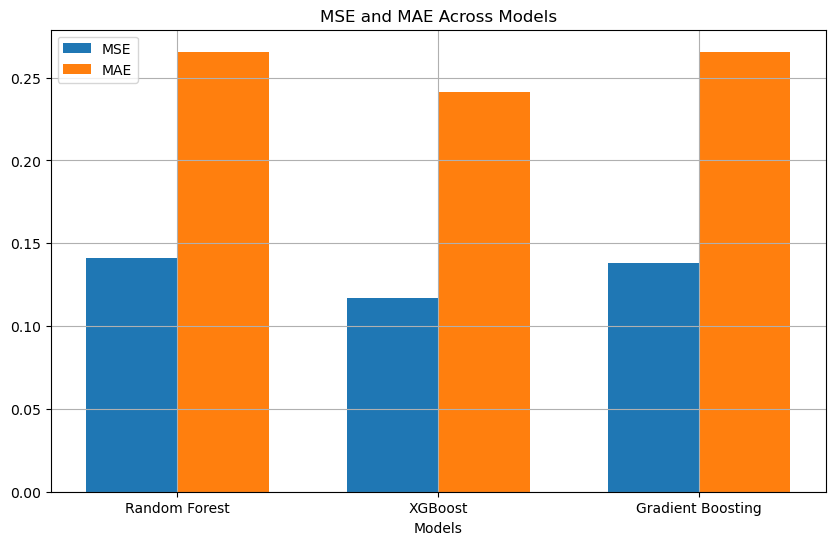

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you've already computed the following metrics
models = ['Random Forest', 'XGBoost', 'Gradient Boosting']
mse = [0.1408, 0.1167, 0.1383]
mae = [0.2652, 0.2413, 0.2656]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, mse, width, label='MSE')
rects2 = ax.bar(x + width/2, mae, width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('MSE and MAE Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.grid(True)
plt.show()


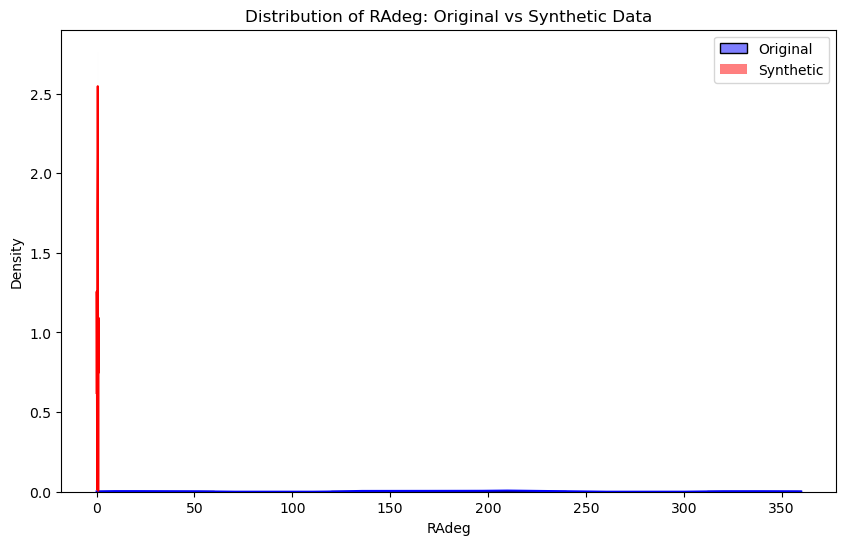

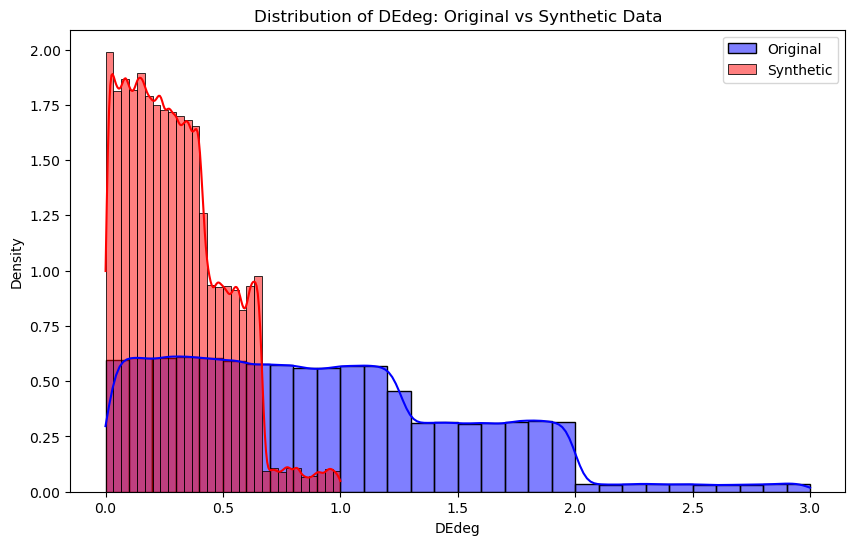

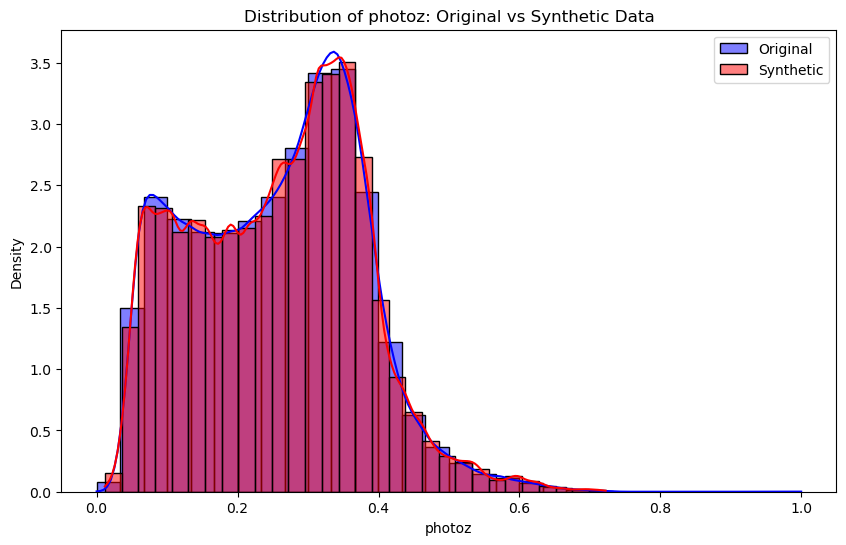

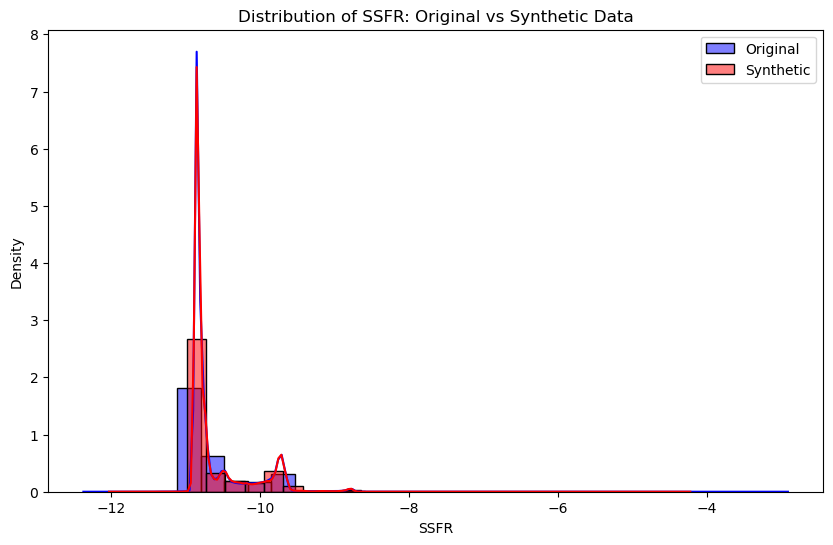

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original and synthetic datasets
original_data = pd.read_csv(r"C:\Users\Satvik\Downloads\photometric_sfr.csv", header=None)
original_data.columns = ['dr9objID', 'objID', 'RAdeg', 'DEdeg', 'photoz', 'Qual', 'SSFR']

synthetic_data = pd.read_csv(r"D:\output aud\improved_synthetic_data.csv")

# Define the features to plot
features = ['RAdeg', 'DEdeg', 'photoz', 'SSFR']

# Plot the distributions
for feature in features:
    plt.figure(figsize=(10, 6))
    
    sns.histplot(original_data[feature], color='blue', kde=True, label='Original', stat="density", bins=30)
    sns.histplot(synthetic_data[feature], color='red', kde=True, label='Synthetic', stat="density", bins=30)
    
    plt.title(f'Distribution of {feature}: Original vs Synthetic Data')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


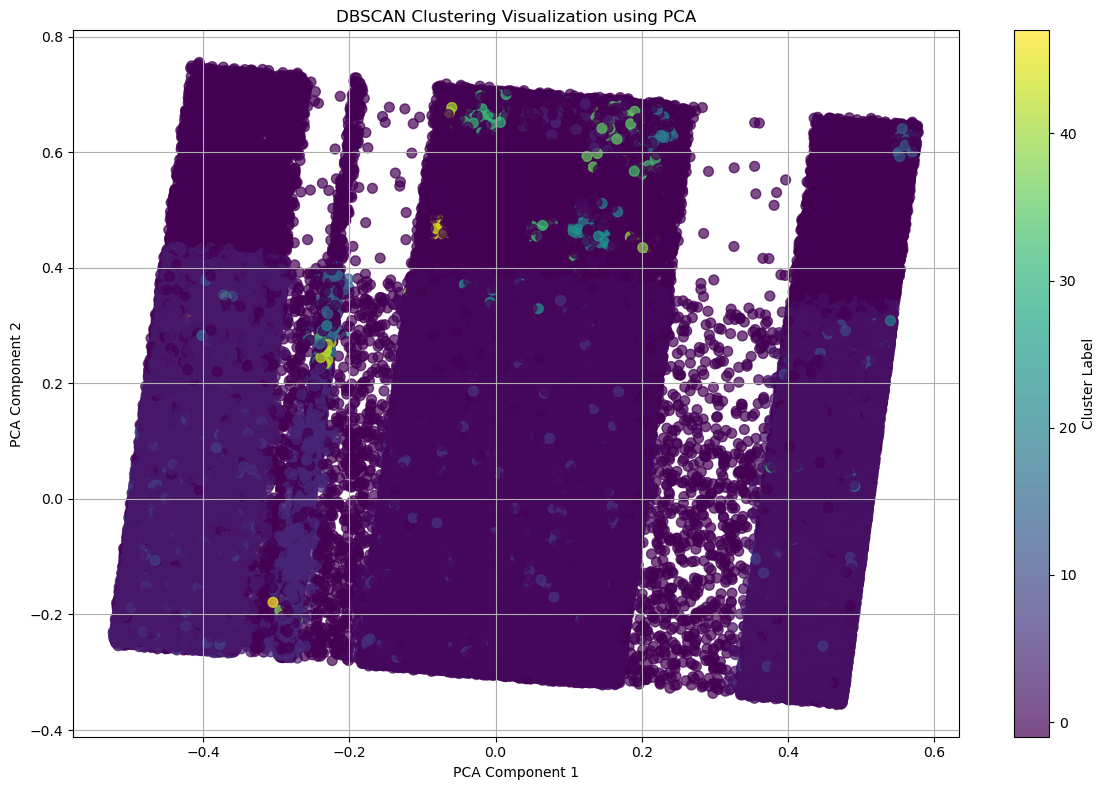

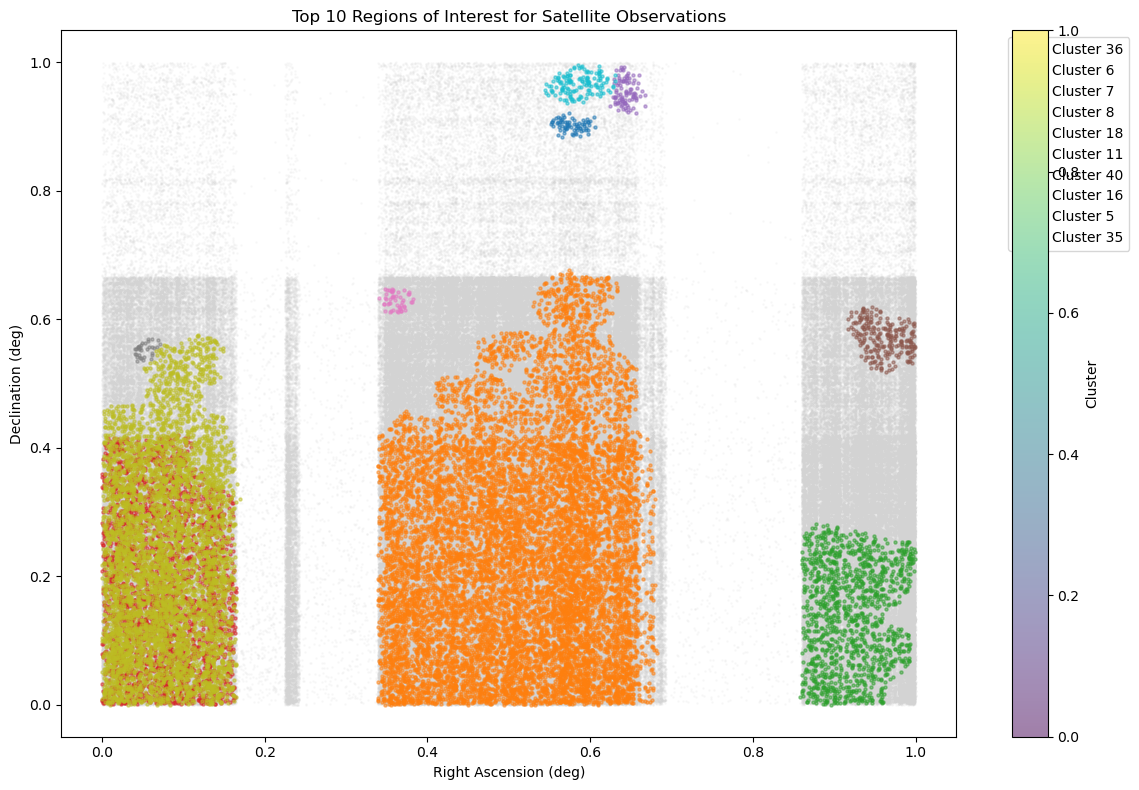

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import joblib

# Load the synthetic data and the best model
synthetic_data = pd.read_csv(r"D:\output aud\improved_synthetic_data.csv")
best_model = joblib.load(r"D:\output aud\best_ssfr_model.joblib")

# Predict SSFR using the best model
X = synthetic_data[['RAdeg', 'DEdeg', 'photoz', 'celestial_position', 'Qual_1', 'Qual_2', 'Qual_3']]
synthetic_data['predicted_SSFR'] = best_model.predict(X)

# Calculate SSFR gradient
synthetic_data['SSFR_gradient'] = np.sqrt(
    np.gradient(synthetic_data['predicted_SSFR'], synthetic_data['RAdeg'])**2 +
    np.gradient(synthetic_data['predicted_SSFR'], synthetic_data['DEdeg'])**2
)

# Normalize features for clustering using MinMaxScaler
scaler = MinMaxScaler()
features_for_clustering = scaler.fit_transform(
    synthetic_data[['RAdeg', 'DEdeg', 'predicted_SSFR', 'SSFR_gradient']]
)

# Determine optimal eps value for DBSCAN
nn = NearestNeighbors(n_neighbors=50)
nn_fit = nn.fit(features_for_clustering)
distances, _ = nn_fit.kneighbors(features_for_clustering)
optimal_eps = np.percentile(distances[:, -1], 90)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=optimal_eps, min_samples=50, algorithm='ball_tree', n_jobs=-1)
synthetic_data['cluster'] = dbscan.fit_predict(features_for_clustering)

# Identify regions of interest
roi_clusters = synthetic_data.groupby('cluster').agg({
    'predicted_SSFR': 'mean',
    'SSFR_gradient': 'mean',
    'RAdeg': 'mean',
    'DEdeg': 'mean',
    'photoz': 'mean'
}).sort_values('SSFR_gradient', ascending=False)
roi_clusters = roi_clusters[roi_clusters.index != -1]  # Exclude noise points
top_10_roi = roi_clusters.head(10)

# Visualize DBSCAN Clustering with PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(features_for_clustering)

plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=synthetic_data['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clustering Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.tight_layout()
plt.show()  # Show the plot

# Visualize Regions of Interest on RAdeg vs DEdeg
plt.figure(figsize=(12, 8))
plt.scatter(synthetic_data['RAdeg'], synthetic_data['DEdeg'], c='lightgray', alpha=0.1, s=1)
for idx, row in top_10_roi.iterrows():
    cluster_data = synthetic_data[synthetic_data['cluster'] == idx]
    plt.scatter(cluster_data['RAdeg'], cluster_data['DEdeg'], alpha=0.5, s=5, label=f'Cluster {idx}')
plt.colorbar(label='Cluster')
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.title('Top 10 Regions of Interest for Satellite Observations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()  # Show the plot


Overview of the Code
Data Preparation:

The function generate_synthetic_data separates continuous and categorical variables from the input data.
Continuous variables are transformed using QuantileTransformer to facilitate the generation of a multivariate normal distribution.
Synthetic Data Generation:

Samples are drawn from a multivariate normal distribution based on the correlation of the transformed continuous variables.
Categorical variables are generated using the original data's distribution.
Data Saving:

The synthetic data is saved to a CSV file for further use.
Statistics Comparison:

Basic statistics (means, standard deviations, etc.) and correlations of both the original and synthetic datasets are printed for comparison.
Distribution Visualization:

Histograms with Kernel Density Estimates (KDE) are plotted to compare distributions of continuous variables.
Q-Q plots are generated to assess how closely the distributions of the original and synthetic data follow a normal distribution.
For categorical variables, bar plots are created to compare the relative frequencies.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import QuantileTransformer

def generate_synthetic_data(data, num_samples):
    # Separate continuous and categorical variables
    continuous_cols = ['RAdeg', 'DEdeg', 'photoz', 'celestial_position', 'SSFR']
    categorical_cols = ['Qual_1', 'Qual_2', 'Qual_3']
    
    # Initialize QuantileTransformer
    qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal')
    
    # Fit and transform continuous data
    continuous_data = data[continuous_cols]
    transformed_data = qt.fit_transform(continuous_data)
    
    # Calculate the correlation matrix of the transformed data
    corr_matrix = np.corrcoef(transformed_data.T)
    
    # Generate samples from a multivariate normal distribution
    mvn_samples = np.random.multivariate_normal(np.zeros(len(continuous_cols)), 
                                                corr_matrix, 
                                                size=num_samples)
    
    # Inverse transform the samples
    synthetic_continuous = qt.inverse_transform(mvn_samples)
    
    # Create DataFrame with synthetic continuous data
    synthetic_df = pd.DataFrame(synthetic_continuous, columns=continuous_cols)
    
    # Generate synthetic categorical data
    for col in categorical_cols:
        probs = data[col].value_counts(normalize=True)
        synthetic_df[col] = np.random.choice(probs.index, size=num_samples, p=probs.values)
    
    return synthetic_df

# Load the preprocessed data
X_train = pd.read_csv(r"D:\output aud\X_train_preprocessed.csv")
y_train = pd.read_csv(r"D:\output aud\y_train.csv")

# Combine features and target
full_data = pd.concat([X_train, y_train], axis=1)

# Generate synthetic data
num_synthetic_samples = len(full_data)
synthetic_data = generate_synthetic_data(full_data, num_synthetic_samples)

# Save the synthetic data
synthetic_data.to_csv(r"D:\output aud\improved_synthetic_data.csv", index=False)

print("Improved synthetic data generated and saved to 'D:\output aud\improved_synthetic_data.csv'")

# Compare basic statistics
print("\nOriginal Data Statistics:")
print(full_data.describe())

print("\nImproved Synthetic Data Statistics:")
print(synthetic_data.describe())

# Compare correlations
print("\nOriginal Data Correlations:")
print(full_data.corr())

print("\nImproved Synthetic Data Correlations:")
print(synthetic_data.corr())

# Visual comparison
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(original, synthetic, columns):
    n_cols = len(columns)
    fig, axes = plt.subplots(n_cols, 2, figsize=(15, 5*n_cols))
    
    for i, col in enumerate(columns):
        # Histogram
        sns.histplot(data=original, x=col, kde=True, color='blue', alpha=0.5, ax=axes[i, 0])
        sns.histplot(data=synthetic, x=col, kde=True, color='red', alpha=0.5, ax=axes[i, 0])
        axes[i, 0].set_title(f'{col} Distribution')
        axes[i, 0].legend(['Original', 'Synthetic'])
        
        # Q-Q plot
        stats.probplot(original[col], dist="norm", plot=axes[i, 1])
        stats.probplot(synthetic[col], dist="norm", plot=axes[i, 1])
        axes[i, 1].set_title(f'{col} Q-Q Plot')
    
    plt.tight_layout()
    plt.show()

# Plot distributions for continuous variables
continuous_cols = ['RAdeg', 'DEdeg', 'photoz', 'celestial_position', 'SSFR']
plot_distributions(full_data, synthetic_data, continuous_cols)

# Plot categorical variable distributions
categorical_cols = ['Qual_1', 'Qual_2', 'Qual_3']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(categorical_cols):
    original_counts = full_data[col].value_counts(normalize=True)
    synthetic_counts = synthetic_data[col].value_counts(normalize=True)
    
    df_counts = pd.DataFrame({'Original': original_counts, 'Synthetic': synthetic_counts}).fillna(0)
    df_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].legend(['Original', 'Synthetic'])

plt.tight_layout()
plt.show()

<>:53: SyntaxWarning: invalid escape sequence '\o'
<>:53: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Satvik\AppData\Local\Temp\ipykernel_11844\1055764141.py:53: SyntaxWarning: invalid escape sequence '\o'
  print("Improved synthetic data generated and saved to 'D:\output aud\improved_synthetic_data.csv'")
C:\Users\Satvik\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


Improved synthetic data generated and saved to 'D:\output aud\improved_synthetic_data.csv'

Original Data Statistics:
               RAdeg          DEdeg         photoz  celestial_position  \
count  838860.000000  838860.000000  838860.000000       838860.000000   
mean        0.487616       0.305389       0.255481            0.487611   
std         0.268370       0.204893       0.120959            0.268361   
min         0.000000       0.000000       0.000000            0.000000   
25%         0.363873       0.137586       0.153636            0.363855   
50%         0.502198       0.280409       0.266039            0.502181   
75%         0.616130       0.436113       0.344672            0.616117   
max         1.000000       1.000000       1.000000            1.000000   

              Qual_1         Qual_2         Qual_3           SSFR  
count  838860.000000  838860.000000  838860.000000  838860.000000  
mean        0.253773       0.740064       0.005947     -10.601618  
std        